# Glass Identification

Name : Parth Gadhvi

Batch : DS2307

Project Description:
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide. Attribute Information-

Id number: 1 to 214

RI: refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

Al: Aluminum

Si: Silicon

K: Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type of glass: (class attribute)
1- building_windows_float_processed

2- building_windows_non_float_processed

3- vehicle_windows_float_processed

4- vehicle_windows_non_float_processed (none in this database)

5- containers

6- tableware

7- headlamps

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7).

Predict : Type of glass

## Importing Libraries

In [1]:
# To analyse & manipulate data
import numpy as np
import pandas as pd

# Visiualise Data
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, randint

#Scaler, Preprocessor, Sampler, Imblearn
from scipy.stats import zscore
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

# Model Evaluation:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, RandomizedSearchCV

# Model metrics
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

#Saving Model:
import pickle

# Prevent WARNINGS!
import warnings
warnings.filterwarnings('ignore')

## Import and Analyze the Data

In [2]:
#loading dataset
df = pd.read_csv('glass.csv')
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


## Data Inspection

In [3]:
df.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [4]:
df.tail()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
208,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
209,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
210,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
211,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
212,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [5]:
#Checking dimension of Dataset
print("Dataset contains {0} rows & {1} columns".format(df.shape[0],df.shape[1]))

Dataset contains 213 rows & 11 columns


In [6]:
#Name of the columns in Dataset
df.columns 

Index(['1', '1.52101', '13.64', '4.49', '1.10', '71.78', '0.06', '8.75',
       '0.00', '0.00.1', '1.1'],
      dtype='object')

Observations:
From the domain knowlege we know there are 214 observations but it is showing 213 onservations and column name are missing in the dataset and first row is taking as column name. We need to handle it now.

In [8]:
#Defining Column names
column_names = ['ID', 'refractive_index', 'Sodium', 'Magnesium', 'Aluminum', 'Silicon', 'Potassium', 'Calcium', 'Barium', 'Iron', 'Type_of_glass']

# Reload the data from the CSV file with no header and setting column names
df = pd.read_csv("glass.csv", header=None, names=column_names)
df

,ID,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## Data Description

In [9]:
#Checking dimension of Dataset
print("Dataset contains {0} rows & {1} columns".format(df.shape[0],df.shape[1]))


Dataset contains 214 rows & 11 columns


In [10]:
#Checking Column Names
df.columns

Index(['ID', 'refractive_index', 'Sodium', 'Magnesium', 'Aluminum', 'Silicon',
       'Potassium', 'Calcium', 'Barium', 'Iron', 'Type_of_glass'],
      dtype='object')

Observations:
We've reloaded the dataset without a header since the first row was initially mistaken as the header. Following that, we added custom column names to our DataFrame. As a result, we now have a DataFrame with 214 observations/rows and 11 columns



In [11]:
#Checking data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                214 non-null    int64  
 1   refractive_index  214 non-null    float64
 2   Sodium            214 non-null    float64
 3   Magnesium         214 non-null    float64
 4   Aluminum          214 non-null    float64
 5   Silicon           214 non-null    float64
 6   Potassium         214 non-null    float64
 7   Calcium           214 non-null    float64
 8   Barium            214 non-null    float64
 9   Iron              214 non-null    float64
 10  Type_of_glass     214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [12]:
#Checking Data Types of the columns
df.dtypes

ID                    int64
refractive_index    float64
Sodium              float64
Magnesium           float64
Aluminum            float64
Silicon             float64
Potassium           float64
Calcium             float64
Barium              float64
Iron                float64
Type_of_glass         int64
dtype: object

Observations:
As we know we have 11 columns and 214 observations in our dataframe.

All the columns has numerical values with no null values, we will cross verify about the null later on.

Among 11 columns, 2 columns "ID" & "Types of glass" has integer values and rest all 9 columns has float values.
Memory uage is 18.5KB

## Duplicate & Missing values

In [14]:
print("We have {} duplicated values in our dataframe".format(df.duplicated().sum()))

We have 0 duplicated values in our dataframe


In [15]:
#Checking Null Values
df.isnull().sum()

ID                  0
refractive_index    0
Sodium              0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
Type_of_glass       0
dtype: int64

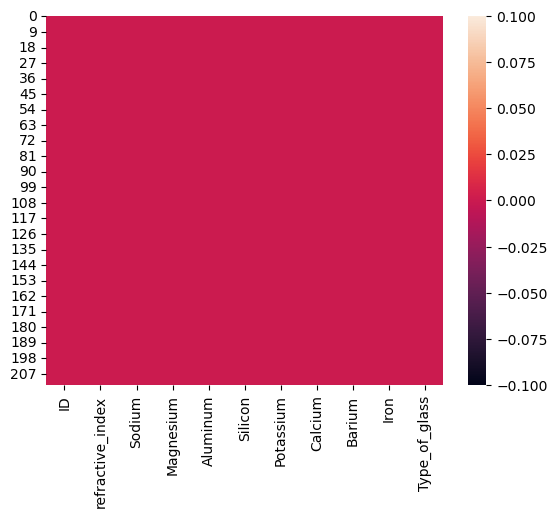

In [16]:
#Lets Visulaise null Values in our DataFrame

sns.heatmap(df.isnull())
plt.show()

Observations:
    
Duplicate Values : We have checked there are no duplicate values in our dataframe.
    
Missing Values : No null values present in our DataFrame.

## Statistical Summary

In [18]:
df.describe()

,ID,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Observations:
Count: Provides the row count of each the columns in our DataFrame. Here it is showing 214 for all the columns that means no missing values in the dataframe.

Mean: The mean values for each column are ID(107.500000), Refractive index(1.518365), Sodium(13.407850), Magnesium(2.684533), Aluminum(1.444907), Silicon(72.650935), Potassium(0.497056), Calcium(8.956963), Barium(0.175047), Iron(0.057009), Types_of_glass(2.780374)

Standard Deviation (std): The standard deviation measures the amount of variation or dispersion in the data. It shows how spread out the values are from the mean. Here we can see, ID has standard deviation of 61.920648, Refractive index(0.003037),Sodium(0.816604), Magnesium(1.442408), Aluminum(0.499270), Silicon(0.774546), Potassium(0.652192), Calcium(1.423153), Barium(0.497219), Iron(0.097439), Types_of_glass(2.103739)

Min: The minimum values observed in each column, which are the smallest values present in your dataset for each respective variable. Here we can clearly see that 'Magnesium', 'Potassium', 'Barium' & 'Iron' has data points with a value of zero

Max: This indicates the maximum values observed in each column, which are the largest values present in your dataframe. Here we can cleary see that "ID", 'Sodium' , 'Silicon' & 'Calcium' holding higest values in our entire dataframe.

25% Percentile: This represents the value below which 25% of the data falls. It gives you a sense of the lower range of values in each column.

50% Percentile: or Median This is the median value for each column. It represents the middle value when the data is sorted in ascending order. Here we can see 'refractive_index', 'sodium' mean is slightly greater than median, it indicates a very slight positive skewed. "Barium" & "Iron" is positive skewed.

75% Percentile: This represents the value below which 75% of the data falls. It gives you a sense of the upper range of values in each column.


## Skewness

In [19]:
#Checking Skewness
print("Skewness present in each column: \n",df.skew())


Skewness present in each column: 
 ID                  0.000000
refractive_index    1.625431
Sodium              0.454181
Magnesium          -1.152559
Aluminum            0.907290
Silicon            -0.730447
Potassium           6.551648
Calcium             2.047054
Barium              3.416425
Iron                1.754327
Type_of_glass       1.114915
dtype: float64


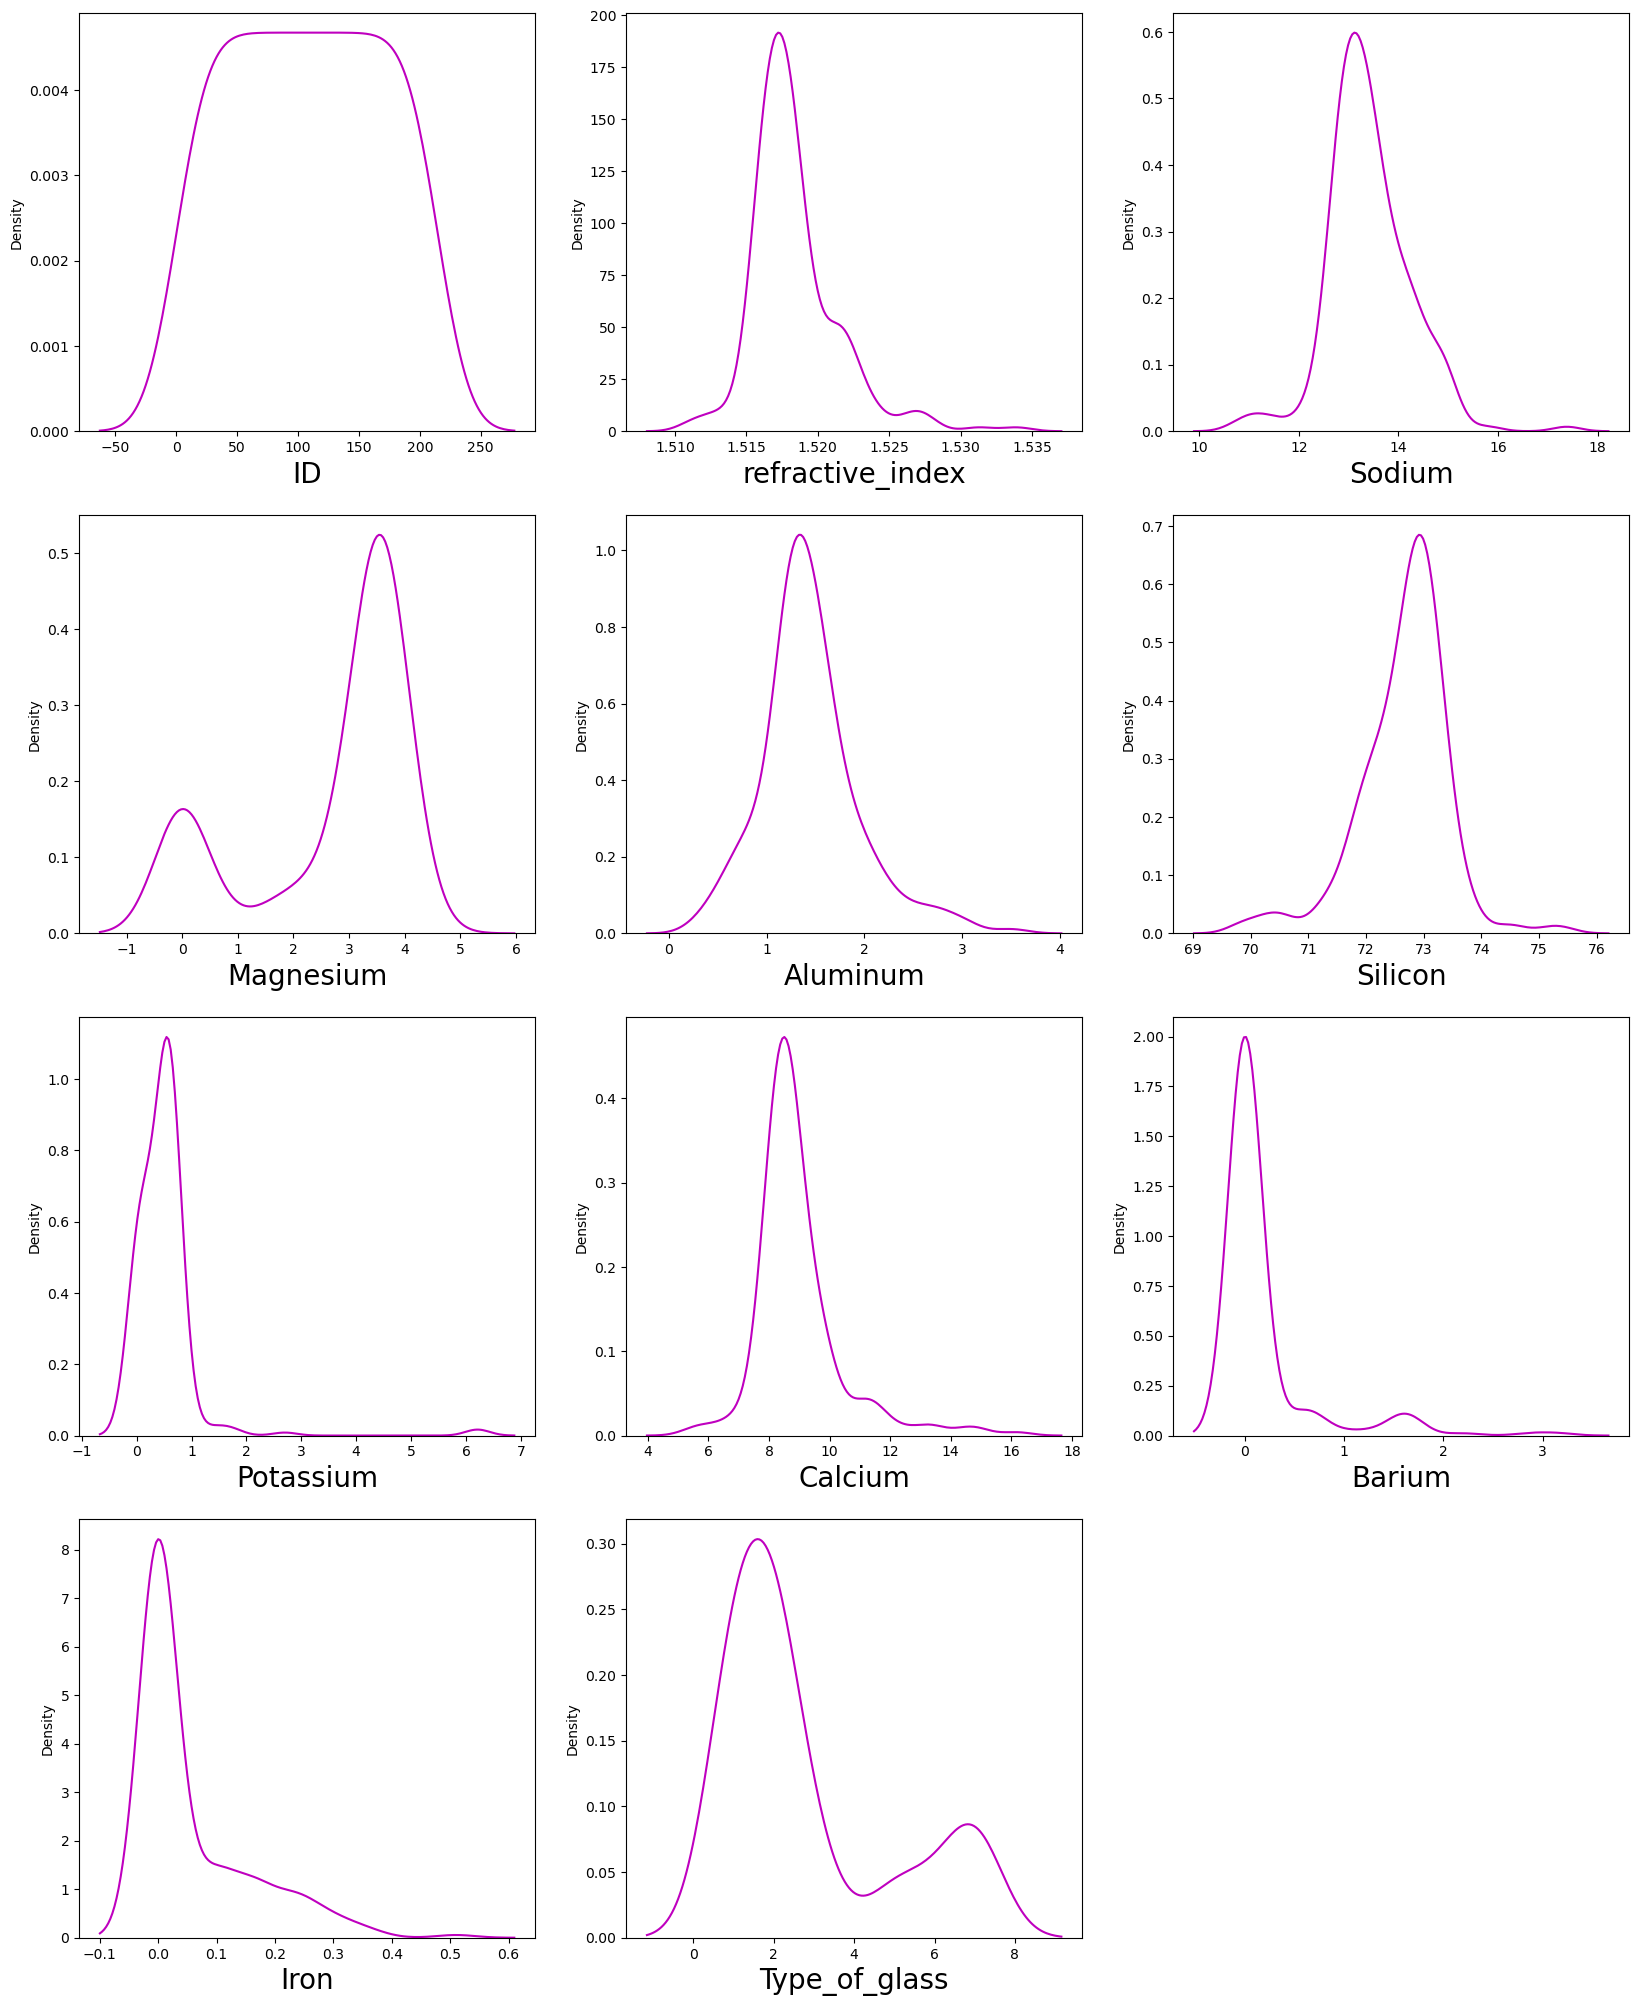

In [20]:
# Let's Visualise it
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.kdeplot(df[column], color='m')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

observations:
You've provided the skewness values for each column in your dataset. Skewness measures the asymmetry of the data distribution. Here's what each skewness value signifies for the respective columns:*

ID: Skewness of 0.000000 indicates that the "ID" column is normally distributed, i.e., it has a symmetrical distribution.

refractive_index: A positive skewness of approximately 1.625431 suggests that the refractive index values are positively skewed, with a tail stretching to the right. There may be some larger values on the right side of the distribution.

Sodium: A positive skewness of approximately 0.454181 indicates a slight positive skew, suggesting that sodium values have a tendency to be slightly higher.

Magnesium: A negative skewness of approximately -1.152559 suggests that magnesium values are negatively skewed, with a tail stretching to the left. There may be some lower values on the left side of the distribution.

Aluminum: A positive skewness of approximately 0.907290 suggests that aluminum values are positively skewed, with a tail stretching to the right.

Silicon: A negative skewness of approximately -0.730447 suggests that silicon values are negatively skewed, with a tail stretching to the left.

Potassium: A positive skewness of approximately 6.551648 indicates a strong positive skew, suggesting that potassium values have a long tail to the right with some large outliers on the right side of the distribution.

Calcium: A positive skewness of approximately 2.047054 indicates that calcium values are positively skewed, with a tail stretching to the right.

Barium: A positive skewness of approximately 3.416425 suggests that barium values are positively skewed, with a tail stretching to the right.

Iron: A positive skewness of approximately 1.754327 suggests that iron values are positively skewed, with a tail stretching to the right.

Type_of_glass: A positive skewness of approximately 1.114915 indicates that the "Type_of_glass" column is positively skewed, with a tail stretching to the right.

### Data Analysis

### Exploring outcome Column

In [21]:
#Exploring Type_of_glass column
df["Type_of_glass"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type_of_glass, dtype: int64

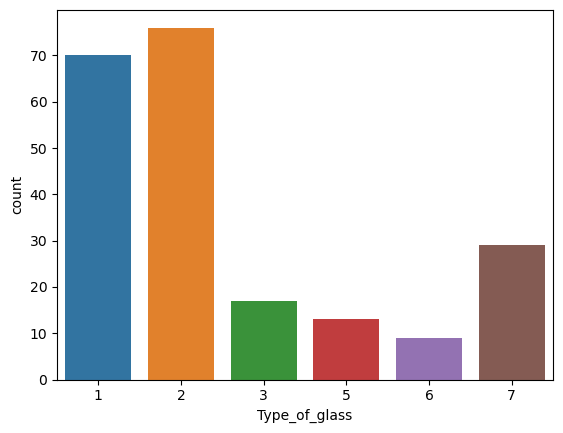

In [22]:
#Visualizing Type_of_glass column
sns.countplot(x='Type_of_glass', data=df)
plt.show()

Observation:
We can readily observe that the highest counts of glass types are 2 and 1, followed by a gradual decrease in counts as we move towards types 6 and 7 has rise in counts. It's worth noting that glass types 1 to 4 are typically categorized as window glass, while glass types 5 to 7 are often categorized as non-window glass. We will create a new column based on the types of glass as we need to categories it in window glass and non window glass.

In [23]:
#creating new column as glass type where we will use 0 for window glass and 1 for non window glass
df["glass_type"]= df["Type_of_glass"].apply(lambda x: 1 if x > 4 else 0 )

#delete Type_of_glass column
df = df.drop(['Type_of_glass'], axis = 1)

In [24]:
#Total count of observations for window glass and no window glass
df["glass_type"].value_counts()

0    163
1     51
Name: glass_type, dtype: int64

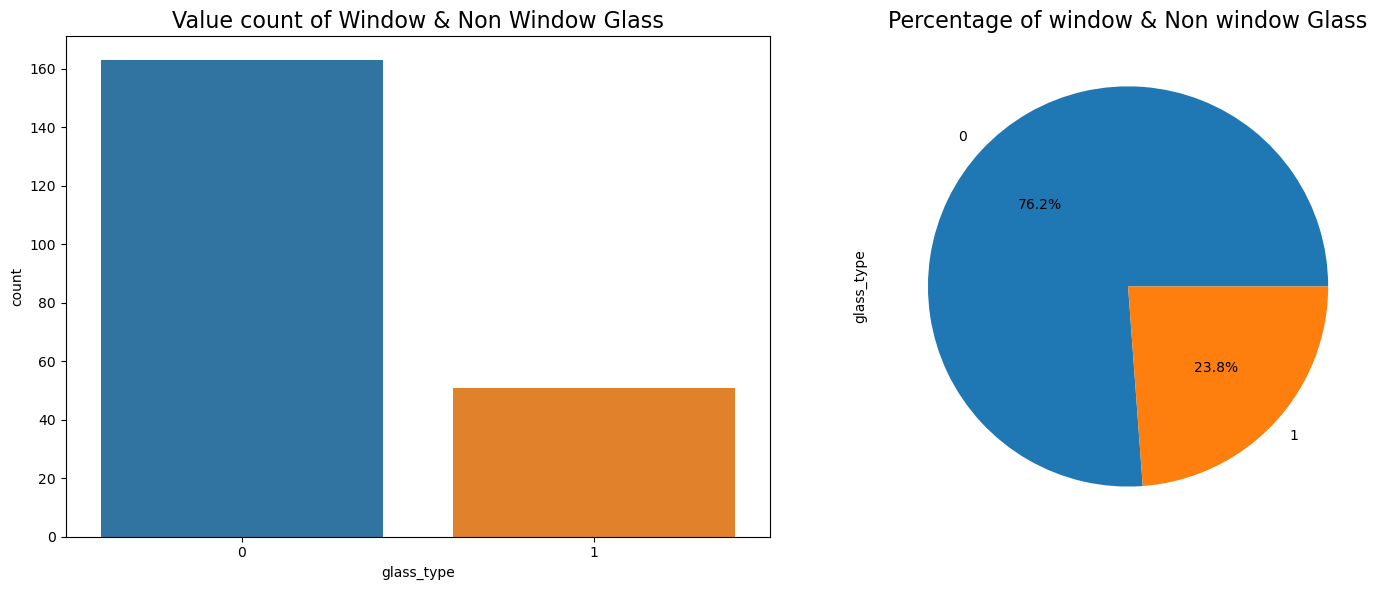

In [25]:
#Checking the distribution of window glass and non window glass
fig,axes=plt.subplots(1,2,figsize=(15,6))

#first plot using count plot
sns.countplot(x="glass_type", data=df, ax=axes[0])
axes[0].set_title("Value count of Window & Non Window Glass", fontsize=16)

#Second plot using pie plot  for percentage
df['glass_type'].value_counts().plot(kind="pie", autopct="%0.1f%%", ax=axes[1])
axes[1].set_title("Percentage of window & Non window Glass", fontsize=16)

plt.tight_layout()
plt.show()

Observations:
First of all we have created a new column named 'glass_type' based on the column 'type of glass' where 0 denotes window glass and 1 denotes non window glass.

We can clearly see that count of window class is much higher than non window glass, that means our data is imbalanced. We need to balance it for machine learning models but we will handle it later on.

We have dropped "Type_of_Column" as we will use our new column "Glass_type" for rest of the process and investigation.

## Univariate Analysis

In [26]:
# Checking the value counts and unique values of each column

for column in df.columns[:-1]:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print(f"Unique values: {df[column].unique()}\n")
    print("-" * 50)  # Add a separator line

Column: ID
1      1
135    1
137    1
138    1
139    1
      ..
75     1
76     1
77     1
78     1
214    1
Name: ID, Length: 214, dtype: int64
Unique values: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207

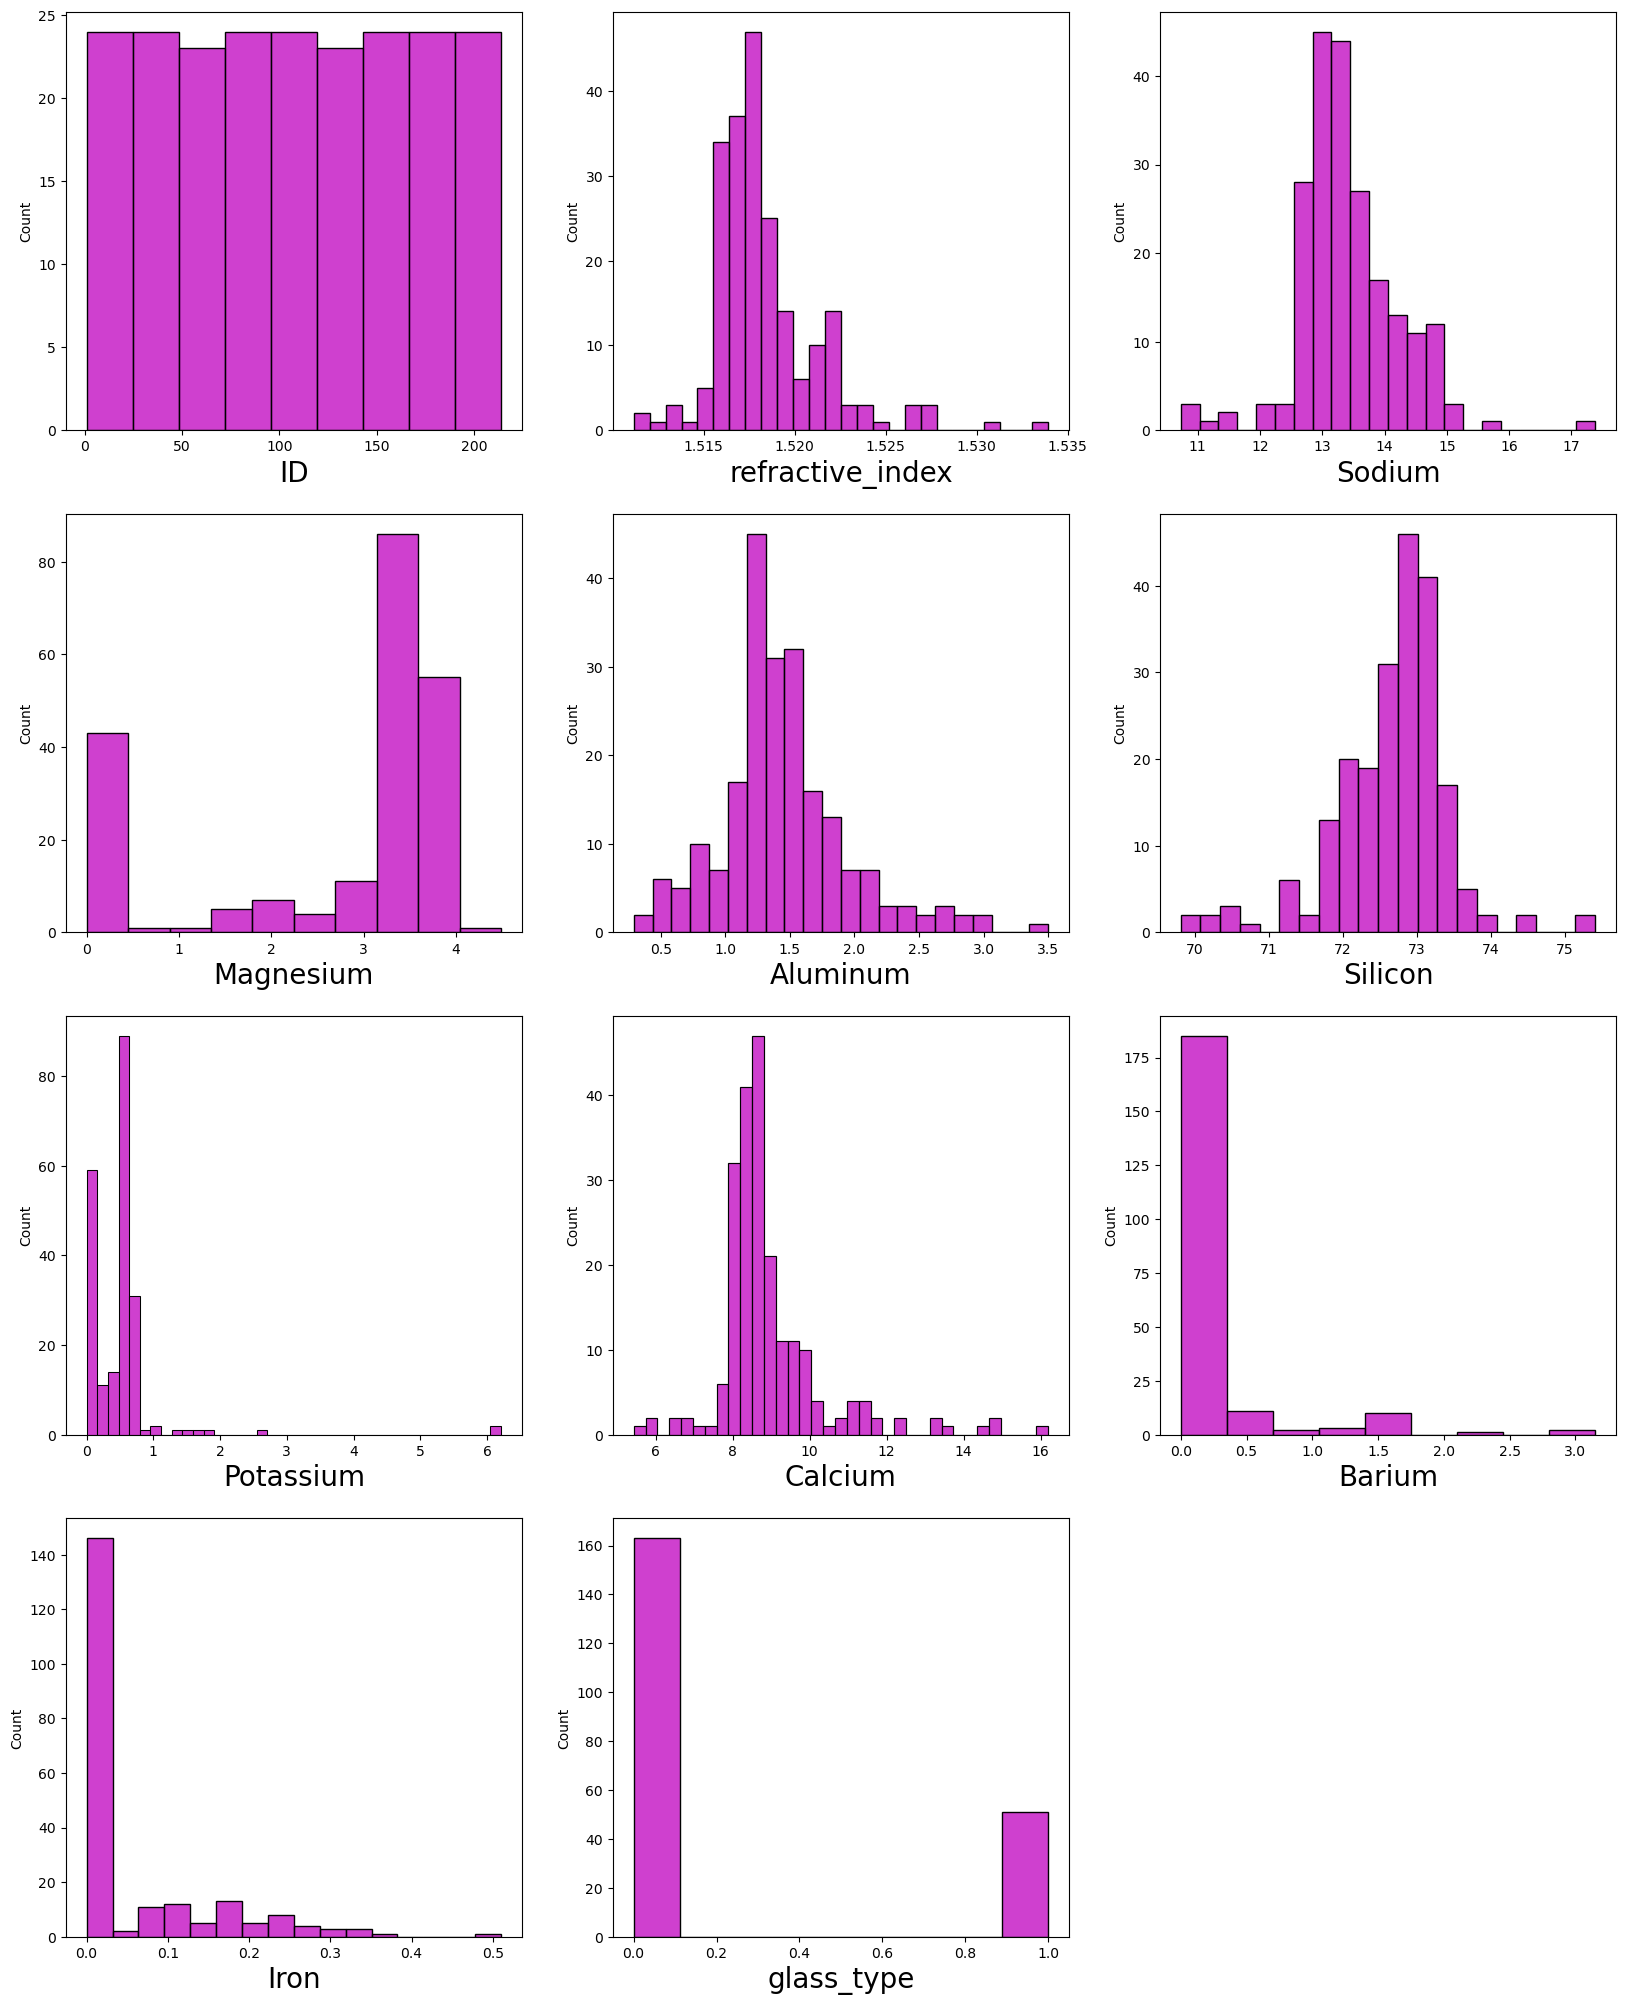

In [27]:
#Visiualizing it using Histogram

plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.histplot(df[column], color='m')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


Observations:
Here are the value counts and unique values for each column, along with some observations:

Column: ID

The "ID" column serves as a unique identifier for each glass sample, with values ranging from 1 to 214.
This column appears to be a sequential identifier for the records and does not contain any duplicate or missing values.
We will drop this column as it wont help us to detect type of glass
Column: Sodium

Sodium has 142 unique values.
The most common value for Sodium is 13.02, occurring 5 times.
Sodium values range between 11.45 and 17.38.
Column: Magnesium

Magnesium has 94 unique values.
The most common value for Magnesium is 0.00, occurring 42 times.
Magnesium values range between 0.00 and 3.98.
Column: Aluminum

Aluminum has 118 unique values.
The most common value for Aluminum is 1.54, occurring 8 times.
Aluminum values range between 0.29 and 3.5.
Column: Silicon

Silicon has 133 unique values.
The most common value for Silicon is 72.86, occurring 4 times.
Silicon values range between 69.81 and 75.41.
Column: Potassium

Potassium has 65 unique values.
The most common value for Potassium is 0.00, occurring 30 times.
Potassium values range between 0.00 and 6.21.
Column: Calcium

Calcium has 143 unique values.
The most common value for Calcium is 8.03, occurring 5 times.
Calcium values range between 5.43 and 16.19.
Column: Barium

Barium has 32 unique values.
The most common value for Barium is 0.00, occurring 176 times.
Barium has several distinct values ranging from 0.00 to 3.15.
Column: Iron

Iron has 32 unique values.
The most common value for Iron is 0.00, occurring 144 times.
Iron values range between 0.00 and 0.51.

Insights:

Sodium, Magnesium, Aluminum, Silicon, Potassium, Calcium, Barium, and Iron columns have a wide range of unique values, which suggests diversity in the dataset.

Some columns, like Sodium and Magnesium, have dominant values occurring multiple times, while others have more evenly distributed values.

The "glass_type" column is the target variable, indicating two classes (0 and 1), which implies a binary classification problem.

These observations provide an initial understanding of the dataset's features and the distribution of values in each column, which can be useful for further analysis and modelingMm

## Bivariate Analysis

### refractive_index vs glass type

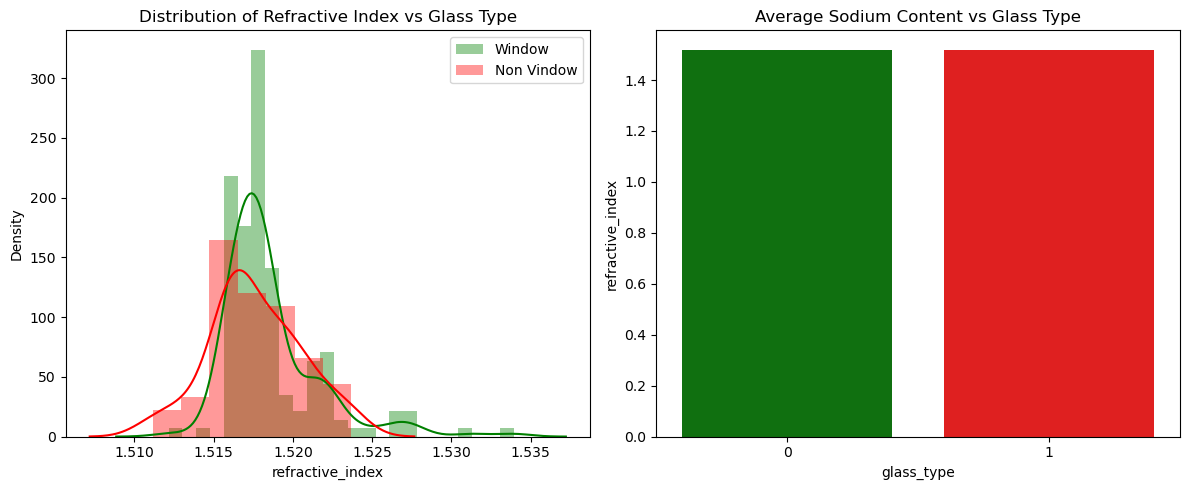

In [28]:
#create Subplots
fig, axes =plt.subplots(1,2,figsize=(12,5))

# First Plot: Distribution of refractive_index vs Glass type
sns.distplot(df[df['glass_type']==0]['refractive_index'], label= "Window", color='g', ax=axes[0])
sns.distplot(df[df['glass_type']==1]['refractive_index'],label="Non Vindow", color='r', ax=axes[0])
axes[0].set_title("Distribution of Refractive Index vs Glass Type")
axes[0].legend()

# Second Plot: Avg. refractive_index vs Glass Type
sns.barplot(x='glass_type', y='refractive_index', data=df, palette={0: "g", 1: "r"}, ax=axes[1])
axes[1].set_title('Average Sodium Content vs Glass Type')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

In [29]:
print("Skewness of Refractive_Index: ", df['refractive_index'].skew())
print("Skewness of Refractive_Index to Window glass",df[df['glass_type']==0]['refractive_index'].skew())
print("Skewness of Refractive_Index to Non Window glass",df[df['glass_type']==1]['refractive_index'].skew())

Skewness of Refractive_Index:  1.6254305060087644
Skewness of Refractive_Index to Window glass 2.077384043664804
Skewness of Refractive_Index to Non Window glass 0.08369963152156258


Observations:
1.Refractive Index Distribution:

Both "Window" and "Non-Window" glass types exhibit different distributions of refractive index values.

The distribution of refractive index for "Window" glass appears to be centered around a specific range, with relatively lower variation.

In contrast, the distribution for "Non-Window" glass is broader and shows more variation in refractive index values.

Average Refractive Index:

The bar plot on the right side shows that the average refractive index for "Non-Window" glass is slightly higher than that of "Window" glass.

This suggests that refractive index can serve as a distinguishing feature, with "Non-Window" glass typically having a slightly higher average refractive index.

Overlap:

There is some overlap in refractive index values between the two glass types.

While "Non-Window" glass generally has a higher refractive index, there are instances of "Window" glass with refractive index values overlapping with those of "Non-Window" glass.

Overall, these observations indicate that the refractive index can be a differentiating factor between "Window" and "Non-Window" glass types, with "Non-Window" glass typically having a slightly higher average refractive index and a wider range of values.

## Sodium vs glass type

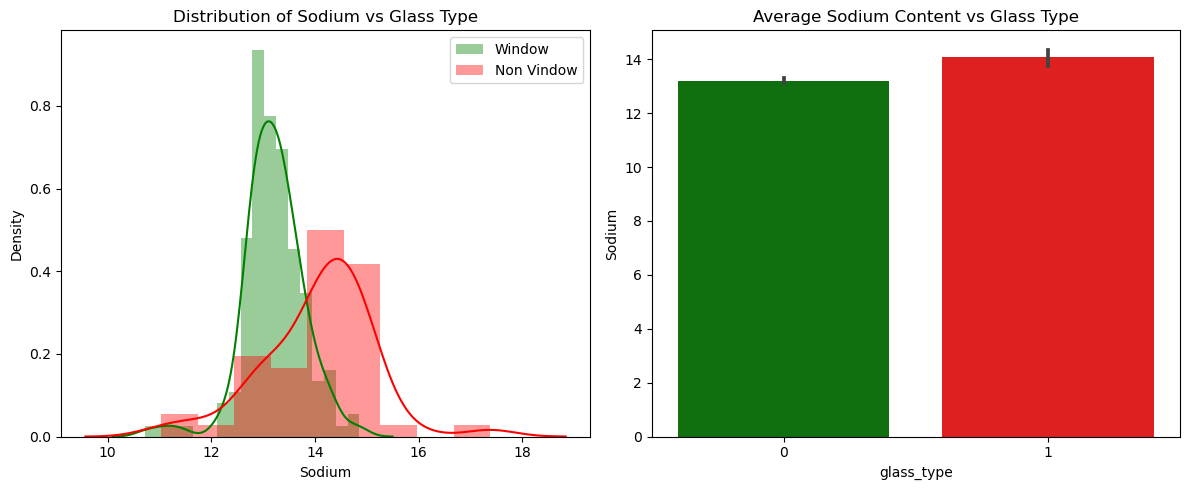

In [30]:
#create Subplots
fig, axes =plt.subplots(1,2,figsize=(12,5))

# First Plot: Distribution of Sodium vs Glass type
sns.distplot(df[df['glass_type']==0]['Sodium'], label= "Window", color='g', ax=axes[0])
sns.distplot(df[df['glass_type']==1]['Sodium'],label="Non Vindow", color='r', ax=axes[0])
axes[0].set_title("Distribution of Sodium vs Glass Type")
axes[0].legend()

# Second Plot: Avg. Sodium vs Glass Type
sns.barplot(x='glass_type', y='Sodium', data=df, palette={0: "g", 1: "r"}, ax=axes[1])
axes[1].set_title('Average Sodium Content vs Glass Type')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

In [31]:
print("Skewness of Sodium: ", df['Sodium'].skew())
print("Skewness of Sodium compared to Window glass",df[df['glass_type']==0]['Sodium'].skew())
print("Skewness of Sodium compared to Non Window glass",df[df['glass_type']==1]['Sodium'].skew())

Skewness of Sodium:  0.4541814536577495
Skewness of Sodium compared to Window glass -0.6626489314819541
Skewness of Sodium compared to Non Window glass -0.2945377054811691


Observation:
Sodium Content Range:

Both "Window" and "Non-Window" glass types have sodium content values within a specific range.
"Window" glass type generally exhibits a narrower range of sodium content values, primarily concentrated in the mid-range of values.

In contrast, "Non-Window" glass type shows a broader range of sodium content values, extending from lower to higher values.
Sodium Content Distribution:

The distribution of sodium content for "Window" glass appears roughly symmetric, with a peak in the mid-range of sodium values.

For "Non-Window" glass, the distribution is also roughly symmetric but with a broader peak, covering a wider range of sodium values.
Average Sodium Content:

The bar plot on the right side indicates that the average sodium content is slightly higher in "Non-Window" glass compared to "Window" glass.

This suggests that sodium content can be a differentiating factor between these two types of glass, with "Non-Window" glass typically containing slightly more sodium on average.
Overlap:

There is some overlap in sodium content values between the two glass types, particularly in the mid-range of values.
This overlap suggests that while higher sodium content is characteristic of "Non-Window" glass, there are instances of "Window" glass with moderately high sodium content.

Overall, these observations provide insights into how sodium content varies between "Window" and "Non-Window" glass types, with "Non-Window" glass generally having slightly higher sodium content on average and a wider range of values.

### Magnesium vs glass type

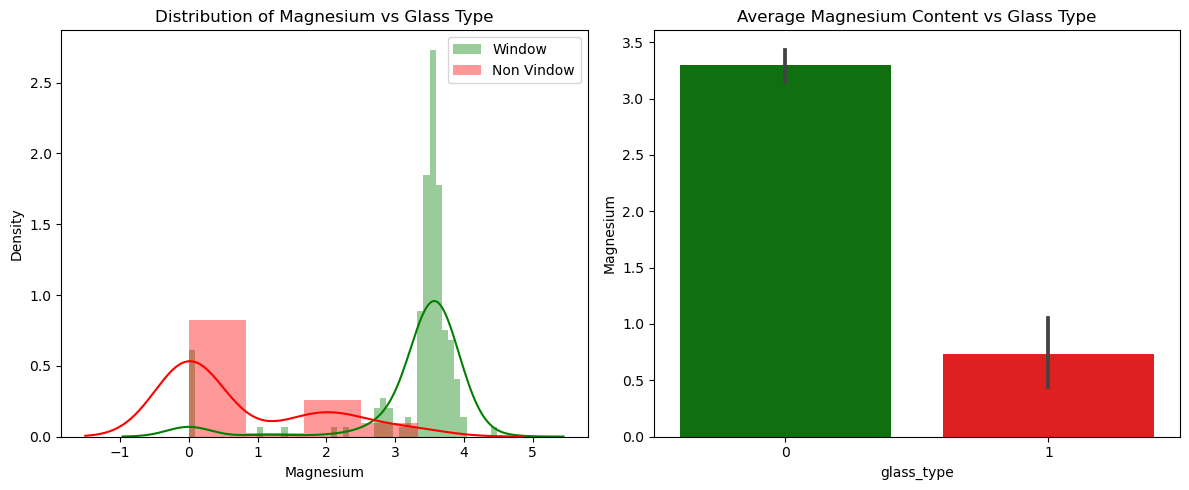

In [32]:
#create Subplots
fig, axes =plt.subplots(1,2,figsize=(12,5))

# First Plot: Distribution of Magnesium vs Glass type
sns.distplot(df[df['glass_type']==0]['Magnesium'], label= "Window", color='g', ax=axes[0])
sns.distplot(df[df['glass_type']==1]['Magnesium'],label="Non Vindow", color='r', ax=axes[0])
axes[0].set_title("Distribution of Magnesium vs Glass Type")
axes[0].legend()

# Second Plot: Avg. Maganesium vs Glass Type
sns.barplot(x='glass_type', y='Magnesium', data=df, palette={0: "g", 1: "r"}, ax=axes[1])
axes[1].set_title('Average Magnesium Content vs Glass Type')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

In [33]:
print("Skewness of Magnesium: ", df['Magnesium'].skew())
print("Skewness of Magnesium compared to Window glass",df[df['glass_type']==0]['Magnesium'].skew())
print("Skewness of Magnesium compared to Non Window glass",df[df['glass_type']==1]['Magnesium'].skew())


Skewness of Magnesium:  -1.1525593175802356
Skewness of Magnesium compared to Window glass -3.0105999930005223
Skewness of Magnesium compared to Non Window glass 1.0903756738173638


Observations:
Magnesium Content Range:

Both "Window" and "Non-Window" glass types have magnesium content values within a specific range.
"Window" glass type generally exhibits a narrower range of magnesium content values, primarily concentrated in the mid-range of values.

In contrast, "Non-Window" glass type shows a broader range of magnesium content values, extending from lower to higher values.

Magnesium Content Distribution:

The distribution of magnesium content for "Window" glass appears relatively symmetric, with a peak in the mid-range of magnesium values.

For "Non-Window" glass, the distribution is also roughly symmetric but with a broader peak, covering a wider range of magnesium values.

Average Magnesium Content:

The bar plot on the right side indicates that the average magnesium content is higher in "Non-Window" glass compared to "Window" glass.

This suggests that magnesium content can be a differentiating factor between these two types of glass, with "Non-Window" glass typically containing more magnesium on average.

Overlap:


There is some overlap in magnesium content values between the two glass types, particularly in the mid-range of values.
This overlap suggests that while higher magnesium content is characteristic of "Non-Window" glass, there are instances of "Window" glass with moderately high magnesium content.

These observations provide insights into how magnesium content varies between "Window" and "Non-Window" glass types, with "Non-Window" glass generally having higher magnesium content on average and a wider range of values.

## Aluminum vs Glass Type

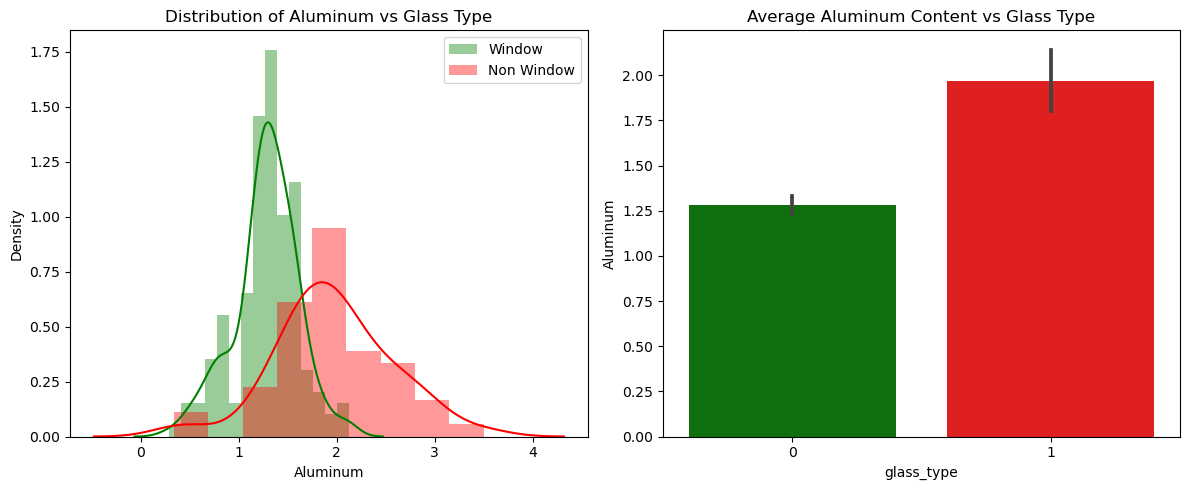

In [34]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First Plot: Distribution of Aluminum vs Glass Type
sns.distplot(df[df['glass_type'] == 0]['Aluminum'], label='Window', color='g', ax=axes[0])
sns.distplot(df[df['glass_type'] == 1]['Aluminum'], label='Non Window', color='r', ax=axes[0])
axes[0].set_title('Distribution of Aluminum vs Glass Type')
axes[0].legend()

# Second Plot: Bar Plot of Aluminum vs Glass Type
sns.barplot(x='glass_type', y='Aluminum', data=df, palette={0: "g", 1: "r"}, ax=axes[1])
axes[1].set_title('Average Aluminum Content vs Glass Type')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

In [35]:
print("Skewness of Aluminum: ", df['Aluminum'].skew())
print("Skewness of Aluminum compared to Window glass",df[df['glass_type']==0]['Aluminum'].skew())
print("Skewness of Aluminum compared to Non Window glass",df[df['glass_type']==1]['Aluminum'].skew())

Skewness of Aluminum:  0.9072898090246346
Skewness of Aluminum compared to Window glass -0.3794193082557876
Skewness of Aluminum compared to Non Window glass -0.032411571447338576


Observation:
Aluminum Content Range:

Both "Window" and "Non-Window" glass types have aluminum content values that span a certain range.
"Window" glass type shows a narrower range of aluminum content, concentrated in the lower to mid-range of values.

In contrast, "Non-Window" glass type exhibits a wider range of aluminum content, with values that extend into the higher range.

Aluminum Content Distribution:

The distribution of aluminum content for "Window" glass appears somewhat left-skewed, with a peak towards lower values and a long tail towards higher values.

On the other hand, the distribution for "Non-Window" glass is more symmetric, with a peak in the mid-range of aluminum content values.

Average Aluminum Content:

It's evident that the average aluminum content is significantly higher in "Non-Window" glass compared to "Window" glass.
This suggests that aluminum is a distinguishing factor between these two types of glass, with "Non-Window" glass typically containing more aluminum.

Overlap:

There is some overlap in the aluminum content values between the two glass types, particularly in the mid-range of values.
This overlap indicates that while higher aluminum content is characteristic of "Non-Window" glass, there are instances of "Window" glass with moderately high aluminum content.

These observations provide insights into how aluminum content varies between "Window" and "Non-Window" glass types, with "Non-Window" glass generally having higher aluminum content on average and a wider range of values.

## Silicon vs Glass Type

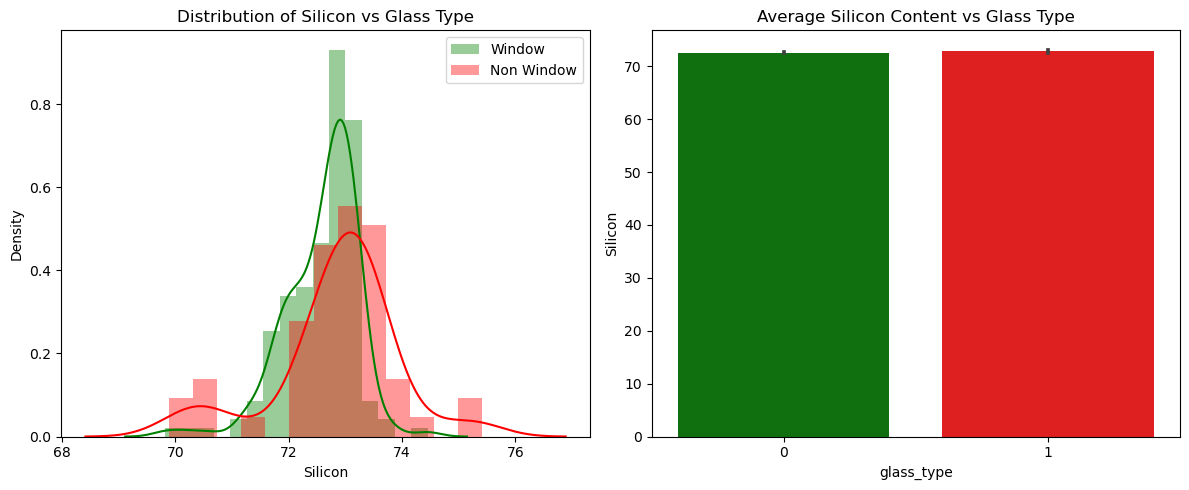

In [36]:
#create Subplot
fig,axes=plt.subplots(1,2, figsize=(12,5))

# First Plot: Distribution of Silicon vs Glass Type
sns.distplot(df[df['glass_type'] == 0]['Silicon'], label='Window', color='g', ax=axes[0])
sns.distplot(df[df['glass_type'] == 1]['Silicon'], label='Non Window', color='r', ax=axes[0])
axes[0].set_title('Distribution of Silicon vs Glass Type')
axes[0].legend()

# Second Plot: Bar Plot of Silicon vs Glass Type
sns.barplot(x='glass_type', y='Silicon', data=df, palette={0: "g", 1: "r"}, ax=axes[1])
axes[1].set_title('Average Silicon Content vs Glass Type')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

In [37]:
print("Skewness of Aluminum: ", df['Silicon'].skew())
print("Skewness of Aluminum compared to Window glass",df[df['glass_type']==0]['Silicon'].skew())
print("Skewness of Aluminum compared to Non Window glass",df[df['glass_type']==1]['Silicon'].skew())

Skewness of Aluminum:  -0.7304472251318588
Skewness of Aluminum compared to Window glass -1.1249566444945238
Skewness of Aluminum compared to Non Window glass -0.785407303953589


Observation:
Silicon Content Distribution:

The distribution of Silicon content for both "Window" and "Non-Window" glass types exhibits some differences.
"Window" glass has a relatively wider and more spread-out distribution of Silicon content, with some variations.

In contrast, "Non-Window" glass shows a slightly narrower distribution with a peak at a particular range of Silicon content.

Average Silicon Content:

The bar plot on the right side reveals that the average Silicon content in "Non-Window" glass is slightly higher than that in "Window" glass.

This suggests that Silicon content can serve as a distinguishing feature, with "Non-Window" glass typically having a slightly higher average Silicon content.

Skewness:

The skewness of the Silicon content distribution across all glass samples is approximately -0.73, indicating a moderate negative skew.

When comparing the skewness of Silicon content between "Window" and "Non-Window" glass types:

Silicon content in "Window" glass has a skewness of approximately -1.12, indicating a more pronounced negative skew.

Silicon content in "Non-Window" glass has a skewness of approximately -0.79, suggesting a slightly less negative skew compared to "Window" glass.

These observations suggest that Silicon content can be a differentiating factor between "Window" and "Non-Window" glass types, with "Non-Window" glass generally having a slightly higher average Silicon content and a distribution that is less negatively skewed compared to "Window" glass.

## Potassium vs Glass Type

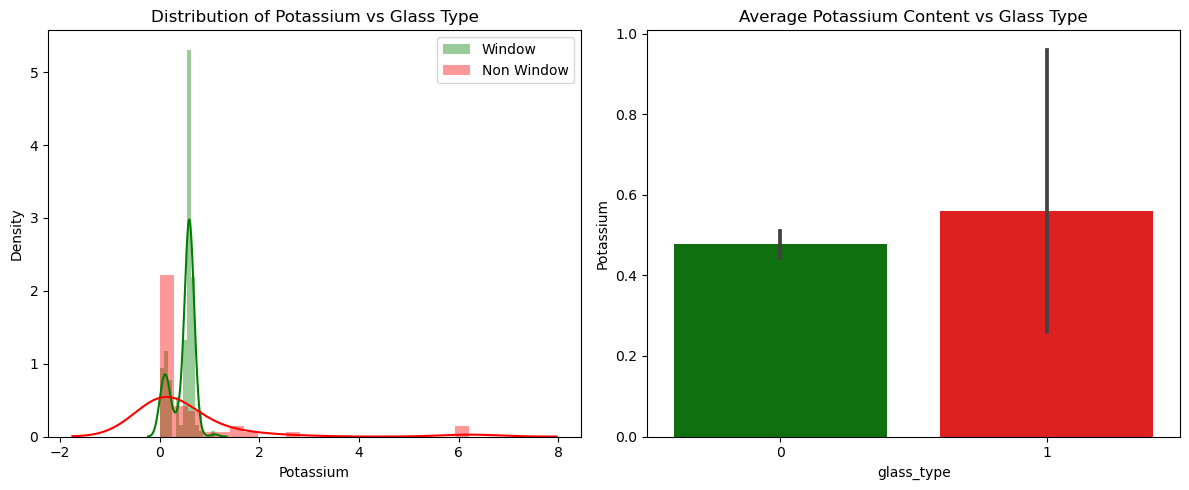

In [38]:
#create Subplot
fig,axes=plt.subplots(1,2, figsize=(12,5))

# First Plot: Distribution of Potassium vs Glass Type
sns.distplot(df[df['glass_type'] == 0]['Potassium'], label='Window', color='g', ax=axes[0])
sns.distplot(df[df['glass_type'] == 1]['Potassium'], label='Non Window', color='r', ax=axes[0])
axes[0].set_title('Distribution of Potassium vs Glass Type')
axes[0].legend()

# Second Plot: Bar Plot of Potassium vs Glass Type
sns.barplot(x='glass_type', y='Potassium', data=df, palette={0: "g", 1: "r"}, ax=axes[1])
axes[1].set_title('Average Potassium Content vs Glass Type')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


In [39]:
print("Skewness of Potassium: ", df['Potassium'].skew())
print("Skewness of Potassium compared to Window glass",df[df['glass_type']==0]['Potassium'].skew())
print("Skewness of Potassium compared to Non Window glass",df[df['glass_type']==1]['Potassium'].skew())

Skewness of Potassium:  6.55164830960496
Skewness of Potassium compared to Window glass -0.8943855969619918
Skewness of Potassium compared to Non Window glass 3.627722966324741


Observations:
Potassium Distribution:

The distribution of Potassium content for both "Window" and "Non-Window" glass types appears to be positively skewed, with values concentrated towards the lower end.

Both distributions have a similar shape, but "Non-Window" glass seems to have slightly higher Potassium content overall.

Average Potassium Content:

The bar plot on the right side shows that the average Potassium content for "Non-Window" glass is higher than that of "Window" glass.

This indicates that Potassium content can be a differentiating factor, with "Non-Window" glass typically having a higher average Potassium content.

Skewness:

The positive skewness in both distributions suggests that most glass samples, regardless of type, have lower Potassium content, but there are some samples with higher Potassium content that cause the distribution to be skewed to the right.

Overall, these observations suggest that Potassium content can be a distinguishing feature between "Window" and "Non-Window" glass types, with "Non-Window" glass typically having a higher average Potassium content and both distributions exhibiting positive skewness.

## Calcium vs Glass Type

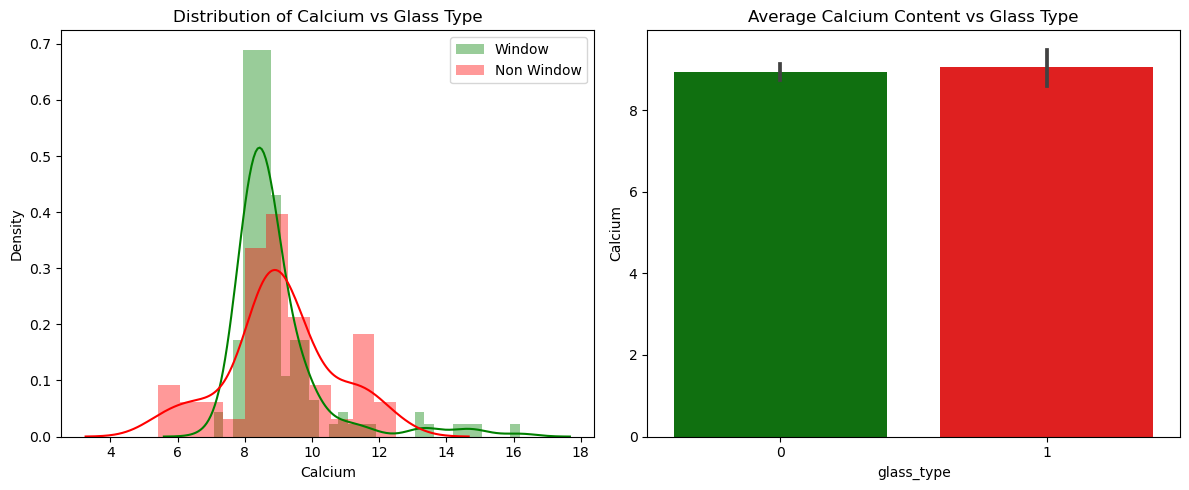

In [40]:
#create Subplot
fig,axes=plt.subplots(1,2, figsize=(12,5))

# First Plot: Distribution of Calcium vs Glass Type
sns.distplot(df[df['glass_type'] == 0]['Calcium'], label='Window', color='g', ax=axes[0])
sns.distplot(df[df['glass_type'] == 1]['Calcium'], label='Non Window', color='r', ax=axes[0])
axes[0].set_title('Distribution of Calcium vs Glass Type')
axes[0].legend()

# Second Plot: Bar Plot of Calcium vs Glass Type
sns.barplot(x='glass_type', y='Calcium', data=df, palette={0: "g", 1: "r"}, ax=axes[1])
axes[1].set_title('Average Calcium Content vs Glass Type')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

In [41]:
print("Skewness of Calcium: ", df['Calcium'].skew())
print("Skewness of Calcium compared to Window glass",df[df['glass_type']==0]['Calcium'].skew())
print("Skewness of Calcium compared to Non Window glass",df[df['glass_type']==1]['Calcium'].skew())

Skewness of Calcium:  2.0470539131183103
Skewness of Calcium compared to Window glass 3.0125612550578227
Skewness of Calcium compared to Non Window glass -0.057306301976677


Observations:

Calcium Distribution:

The distribution of Calcium content for both "Window" and "Non-Window" glass types shows that the majority of samples have Calcium content concentrated in a certain range.

While there is some overlap between the two distributions, the distribution of "Non-Window" glass appears to have slightly higher Calcium content on average.

Average Calcium Content:

The bar plot on the right side illustrates that the average Calcium content for "Non-Window" glass is slightly higher than that of "Window" glass.

This suggests that Calcium content can be a differentiating factor, with "Non-Window" glass generally having a higher average Calcium content.

Outliers:

There seem to be some outliers in the Calcium content for both types of glass, particularly in the "Non-Window" category, where some samples have significantly higher Calcium content than the rest.

In summary, these observations indicate that Calcium content can serve as a distinguishing feature between "Window" and "Non-Window" glass types, with "Non-Window" glass typically having a higher average Calcium content and some potential outliers with extremely high Calcium content in the "Non-Window" category.

## Barium vs Glass Type

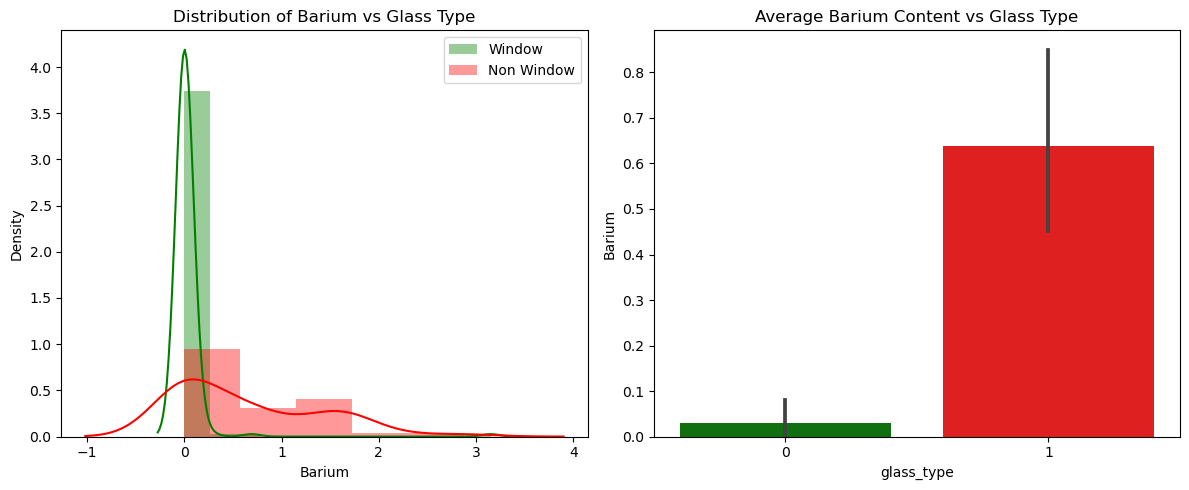

In [42]:
#create Subplot
fig,axes=plt.subplots(1,2, figsize=(12,5))

# First Plot: Distribution of Barium vs Glass Type
sns.distplot(df[df['glass_type'] == 0]['Barium'], label='Window', color='g', ax=axes[0])
sns.distplot(df[df['glass_type'] == 1]['Barium'], label='Non Window', color='r', ax=axes[0])
axes[0].set_title('Distribution of Barium vs Glass Type')
axes[0].legend()

# Second Plot: Bar Plot of Barium vs Glass Type
sns.barplot(x='glass_type', y='Barium', data=df, palette={0: "g", 1: "r"}, ax=axes[1])
axes[1].set_title('Average Barium Content vs Glass Type')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


In [43]:
print("Skewness of Barium: ", df['Barium'].skew())
print("Skewness of Barium compared to Window glass",df[df['glass_type']==0]['Barium'].skew())
print("Skewness of Barium compared to Non Window glass",df[df['glass_type']==1]['Barium'].skew())

Skewness of Barium:  3.4164245693025577
Skewness of Barium compared to Window glass 11.765571656069783
Skewness of Barium compared to Non Window glass 0.9596377730363784


Observations:

Barium Distribution:

The distribution of Barium content for both "Window" and "Non-Window" glass types shows that the majority of samples have very low or zero Barium content.

There is very little variation in Barium content, and most samples have values close to zero.

Average Barium Content:

The bar plot on the right side illustrates that the average Barium content for both "Window" and "Non-Window" glass types is extremely low, with most values being zero.

This suggests that Barium content is not a distinguishing feature between these glass types since the content is predominantly zero for both categories.

Zero Values:

A significant portion of the samples in both categories has zero Barium content, indicating that Barium is not a significant component in the composition of these glass types.

In summary, the observations suggest that Barium content is not a differentiating factor between "Window" and "Non-Window" glass types, as the vast majority of samples in both categories have either zero or very low Barium content.



## Iron vs Glass Type

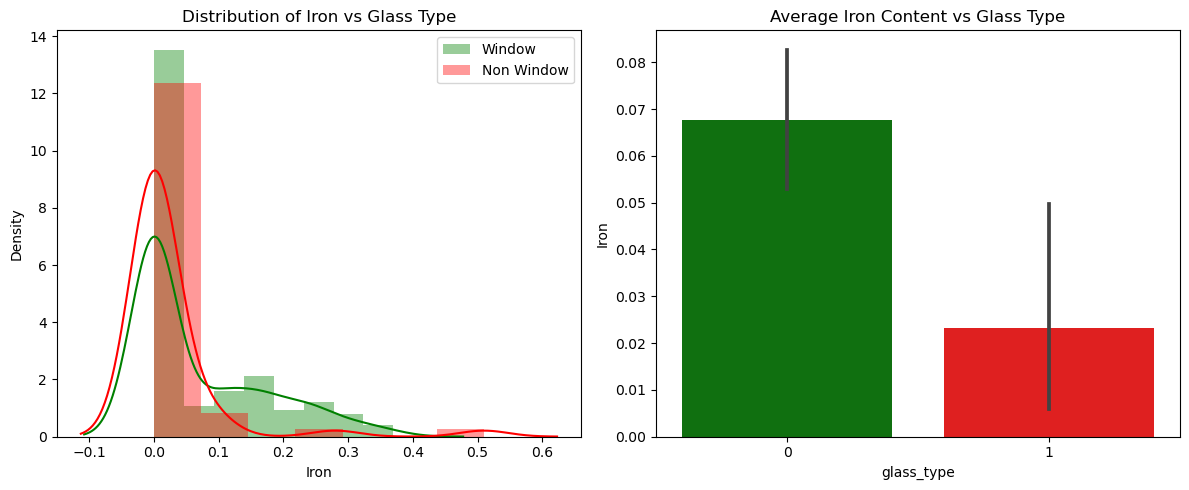

In [44]:
#create Subplot
fig,axes=plt.subplots(1,2, figsize=(12,5))

# First Plot: Distribution of Iron vs Glass Type
sns.distplot(df[df['glass_type'] == 0]['Iron'], label='Window', color='g', ax=axes[0])
sns.distplot(df[df['glass_type'] == 1]['Iron'], label='Non Window', color='r', ax=axes[0])
axes[0].set_title('Distribution of Iron vs Glass Type')
axes[0].legend()

# Second Plot: Bar Plot of Iron vs Glass Type
sns.barplot(x='glass_type', y='Iron', data=df, palette={0: "g", 1: "r"}, ax=axes[1])
axes[1].set_title('Average Iron Content vs Glass Type')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


In [45]:
print("Skewness of Barium: ", df['Iron'].skew())
print("Skewness of Barium compared to Window glass",df[df['glass_type']==0]['Iron'].skew())
print("Skewness of Barium compared to Non Window glass",df[df['glass_type']==1]['Iron'].skew())


Skewness of Barium:  1.754327470435831
Skewness of Barium compared to Window glass 1.2380357879135426
Skewness of Barium compared to Non Window glass 4.8988649063109015


Observations:

Iron Distribution:

The distribution of Iron content for both "Window" and "Non-Window" glass types shows that the majority of samples have very low or zero Iron content.

Most of the samples have zero Iron content, and the non-zero values are generally quite small.

Average Iron Content:

The bar plot on the right side illustrates that the average Iron content for both "Window" and "Non-Window" glass types is extremely low, with most values being zero.

This suggests that Iron content is not a distinguishing feature between these glass types since the content is predominantly zero for both categories.

Zero Values:

A significant portion of the samples in both categories has zero Iron content, indicating that Iron is not a significant component in the composition of these glass types.

In summary, the observations suggest that Iron content is not a differentiating factor between "Window" and "Non-Window" glass types, as the vast majority of samples in both categories have either zero or very low Iron content.

## Multivariate Analysis

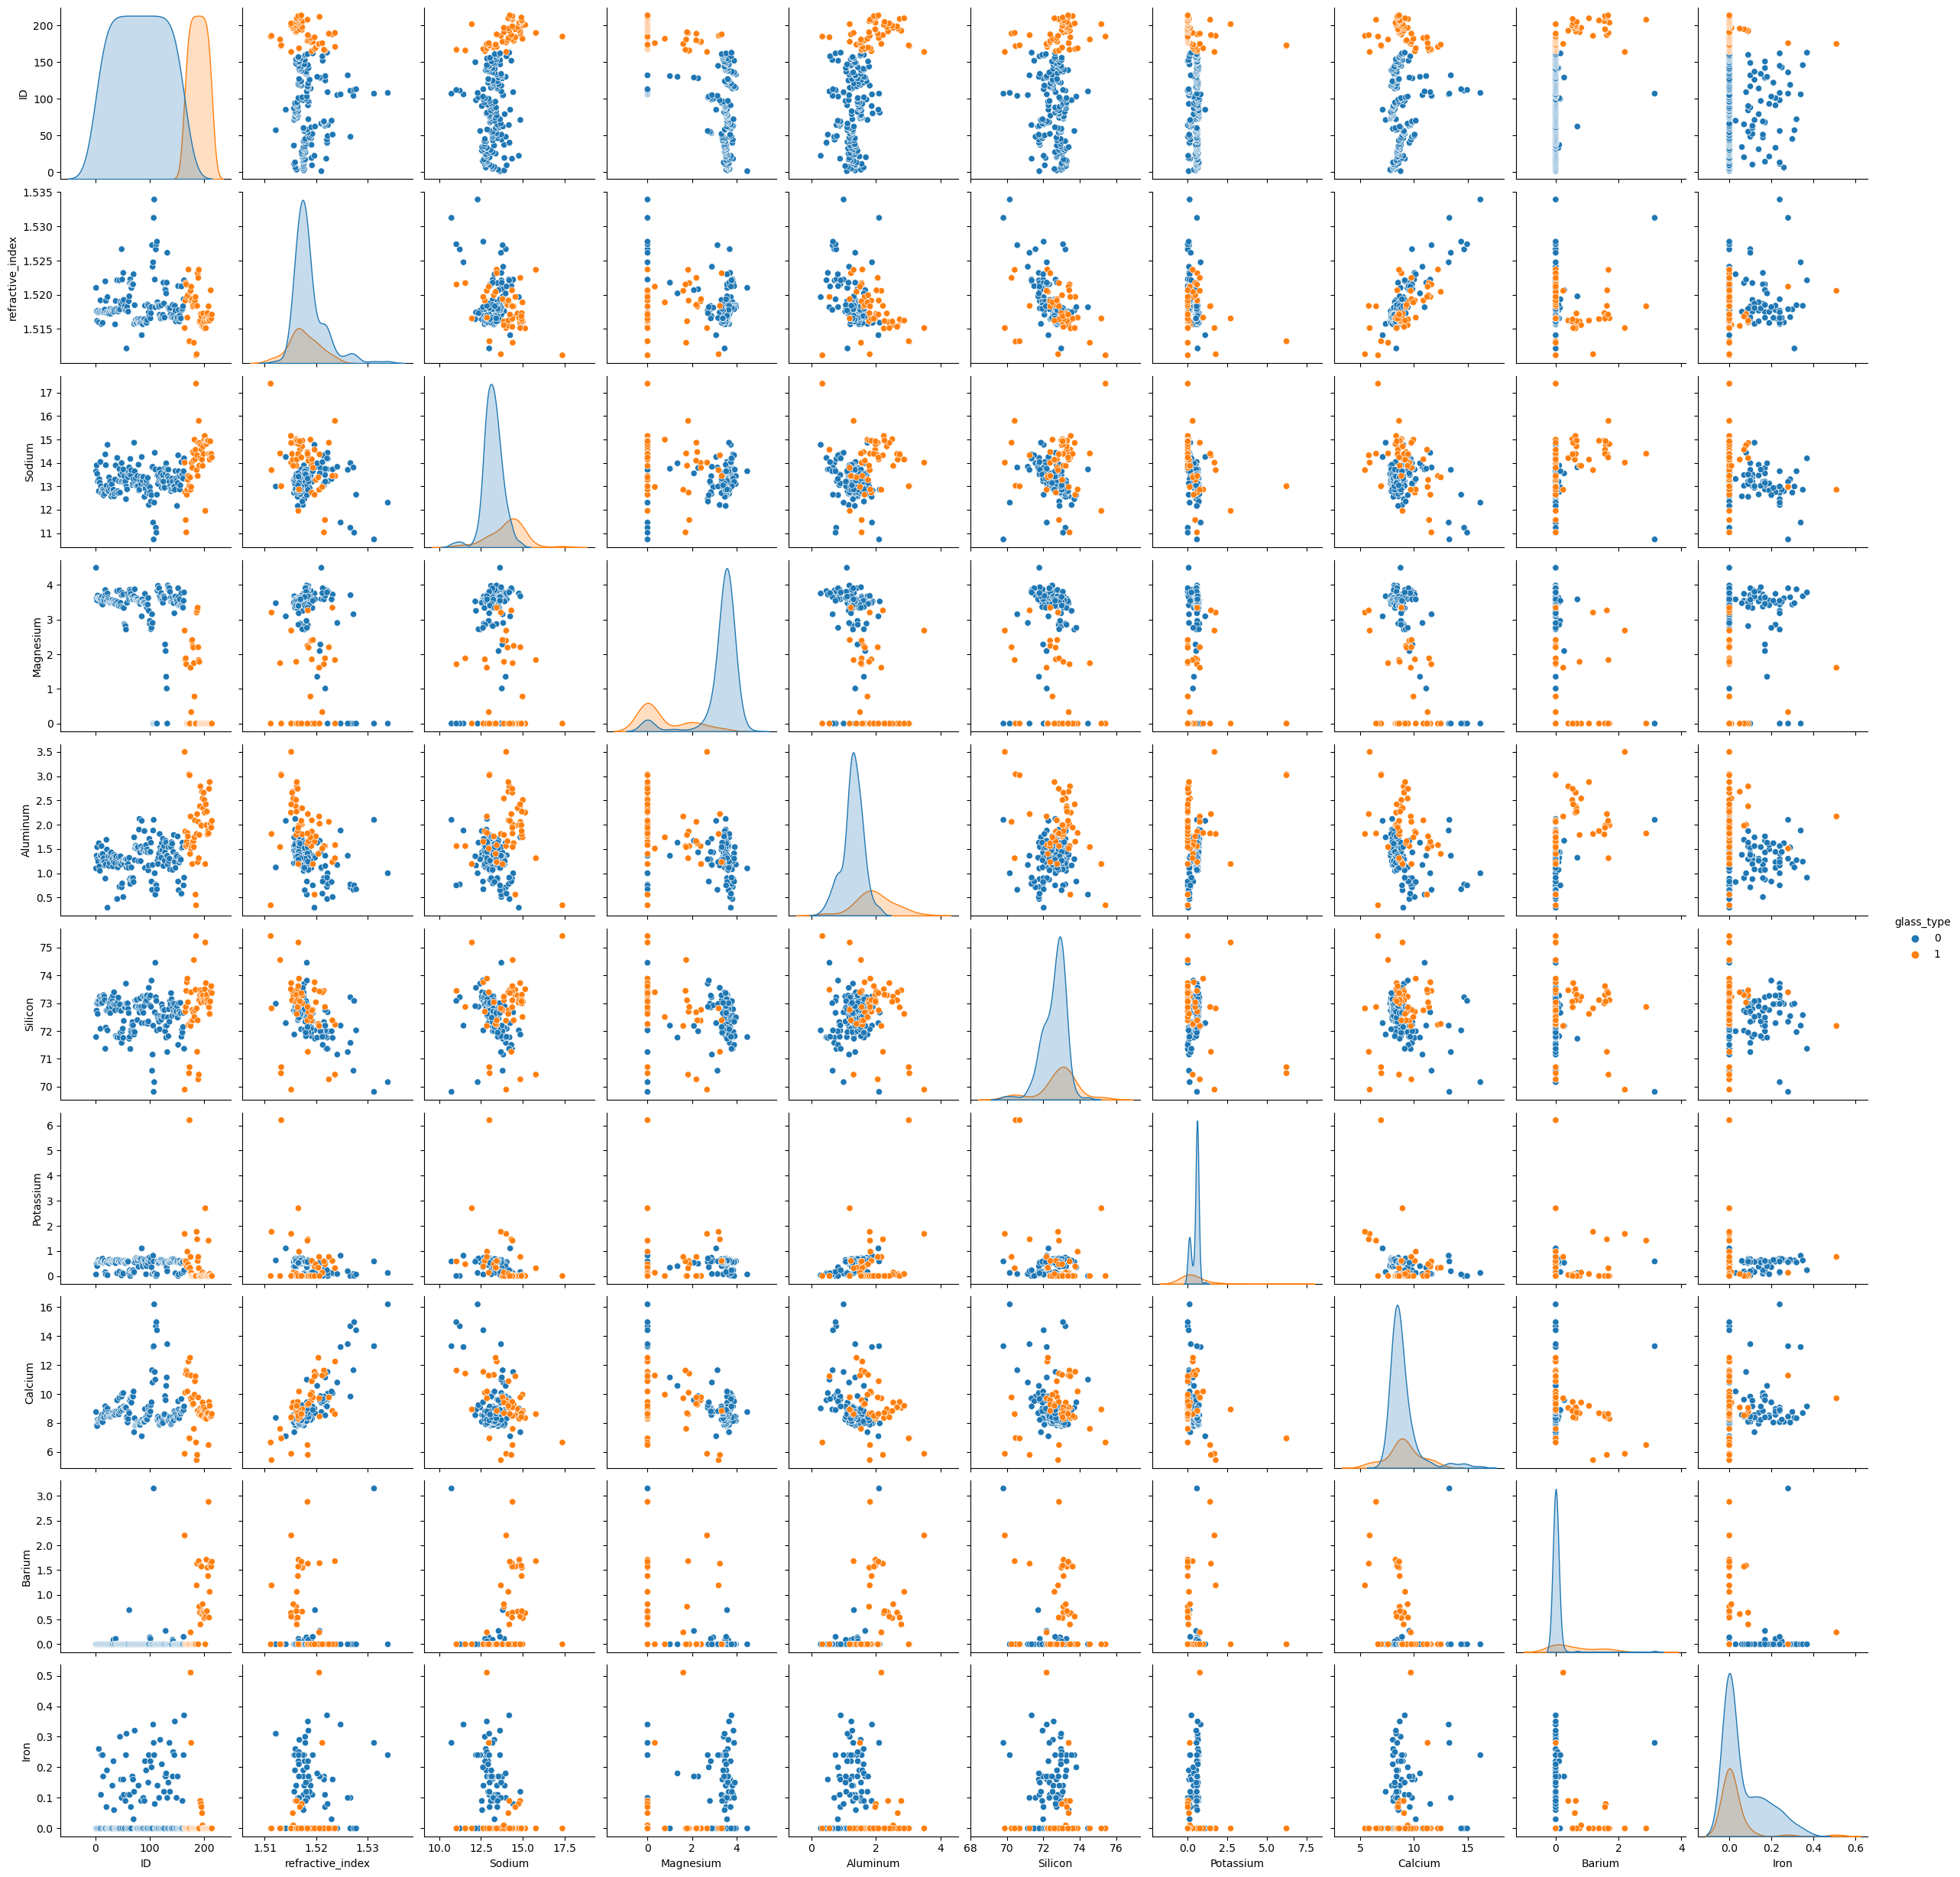

In [46]:
#Pairwise relationship between Variables
sns.pairplot(df, hue='glass_type')
plt.show()

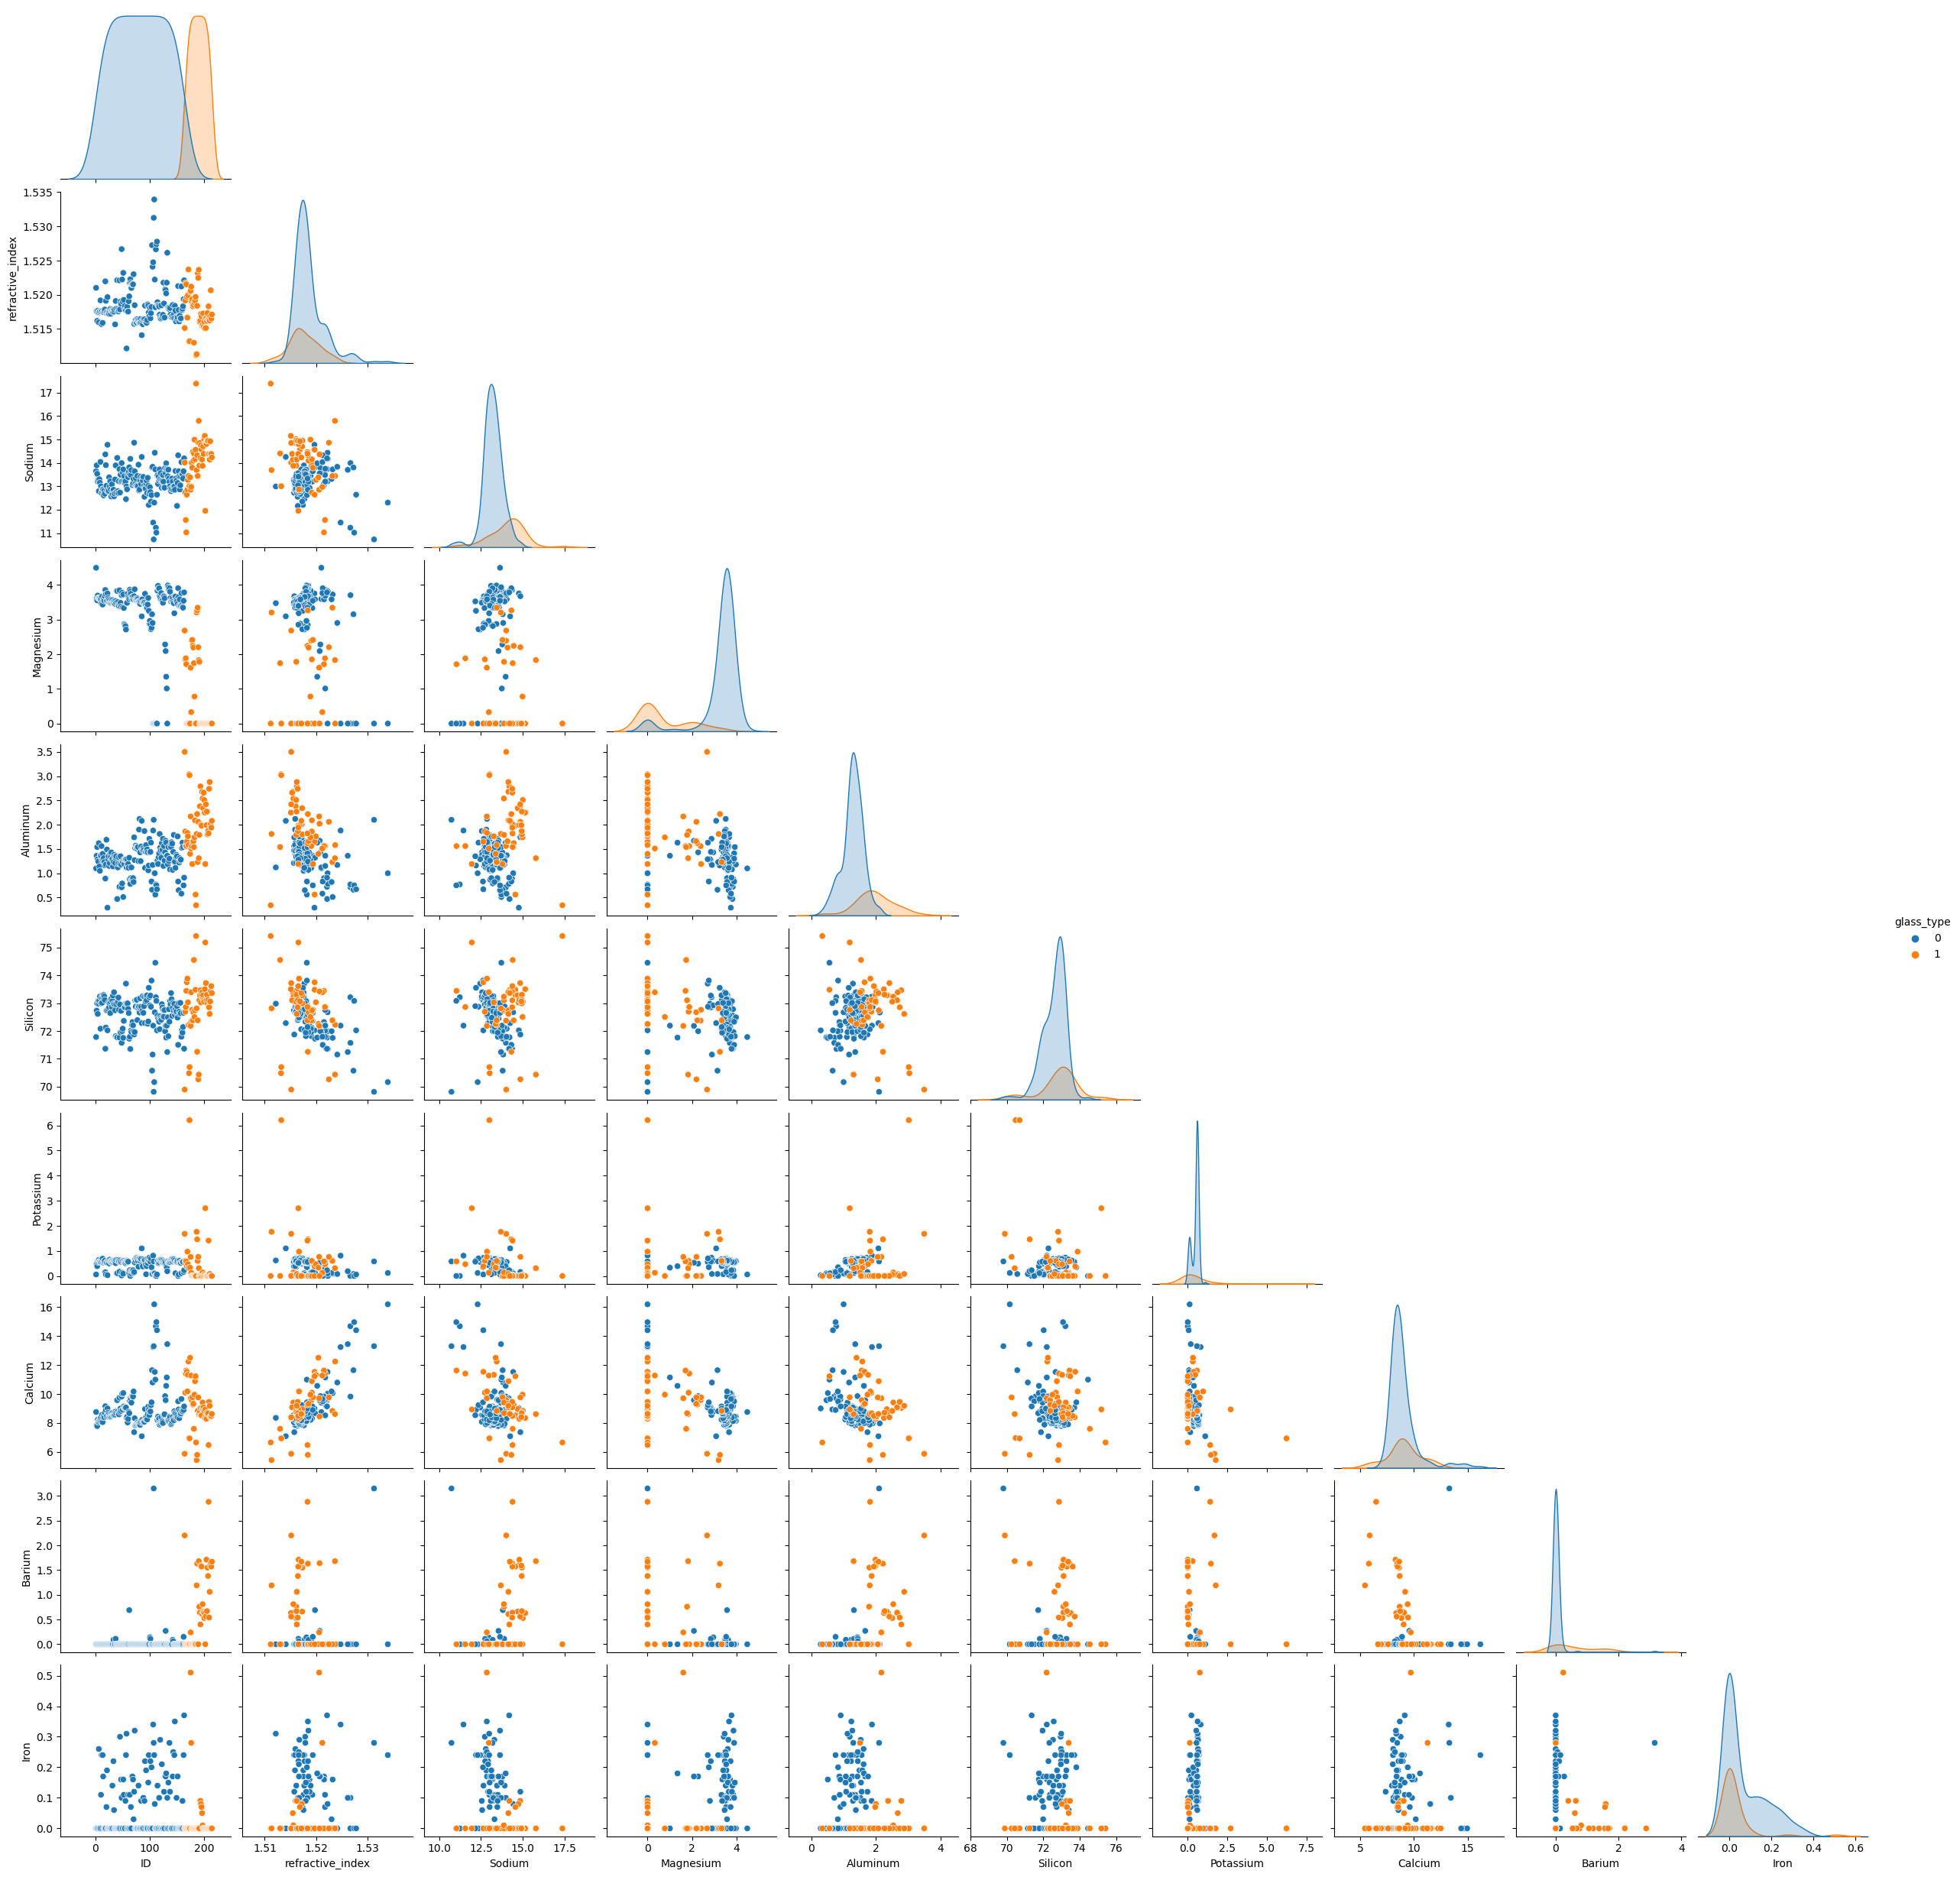

In [47]:
sns.pairplot(df, hue='glass_type', corner=True)
plt.show()

## Correlation Matrix

In [48]:
df.corr()

,ID,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,glass_type
ID,1.000000,-0.072209,0.375722,-0.650328,0.490113,0.061232,0.003149,0.090800,0.451001,-0.072794,0.737956
refractive_index,-0.072209,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.134327
Sodium,0.375722,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.452336
Magnesium,-0.650328,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.758289
Aluminum,0.490113,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.585928
Silicon,0.061232,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.148072
Potassium,0.003149,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,0.053774
Calcium,0.090800,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.040670
Barium,0.451001,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.523403
Iron,-0.072794,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.194903


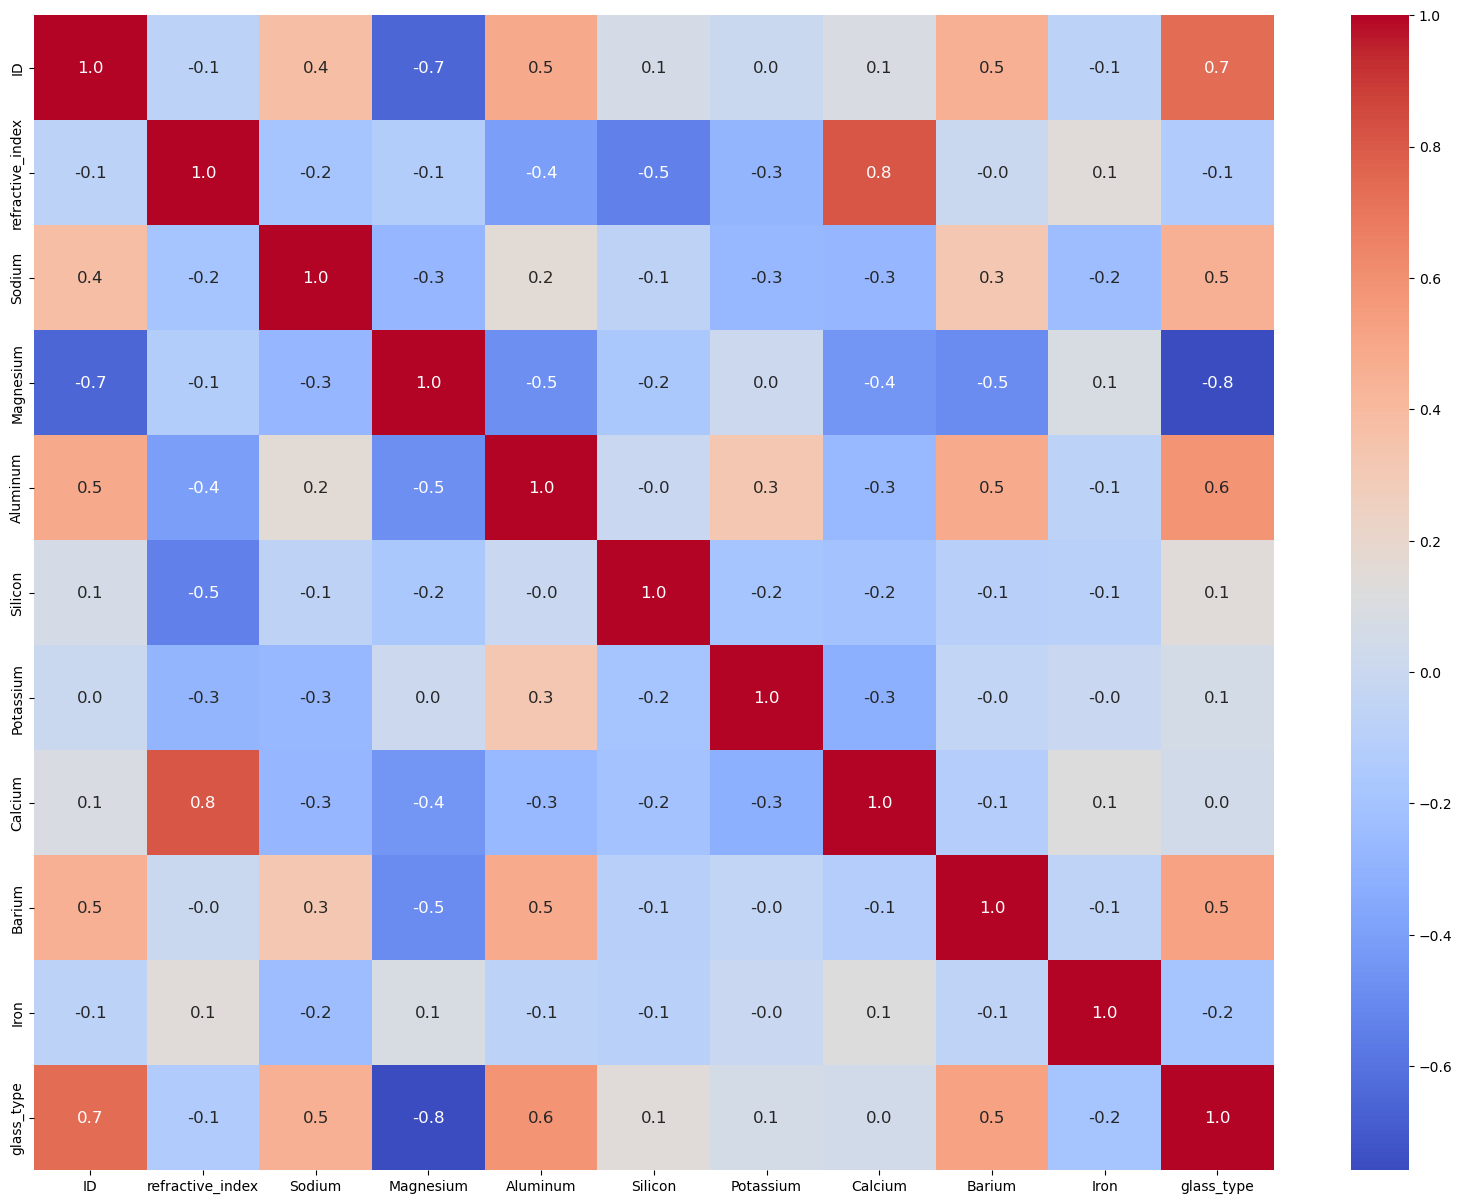

In [49]:
#visulaizing it
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, fmt='.1F', cmap='coolwarm', annot_kws={"size": 12})
plt.show()

### Checking correlation with our target column (Glass Type)

In [50]:
correlation_with_label = df.corr()['glass_type'].abs().sort_values(ascending=False)
print(correlation_with_label)

glass_type          1.000000
Magnesium           0.758289
ID                  0.737956
Aluminum            0.585928
Barium              0.523403
Sodium              0.452336
Iron                0.194903
Silicon             0.148072
refractive_index    0.134327
Potassium           0.053774
Calcium             0.040670
Name: glass_type, dtype: float64


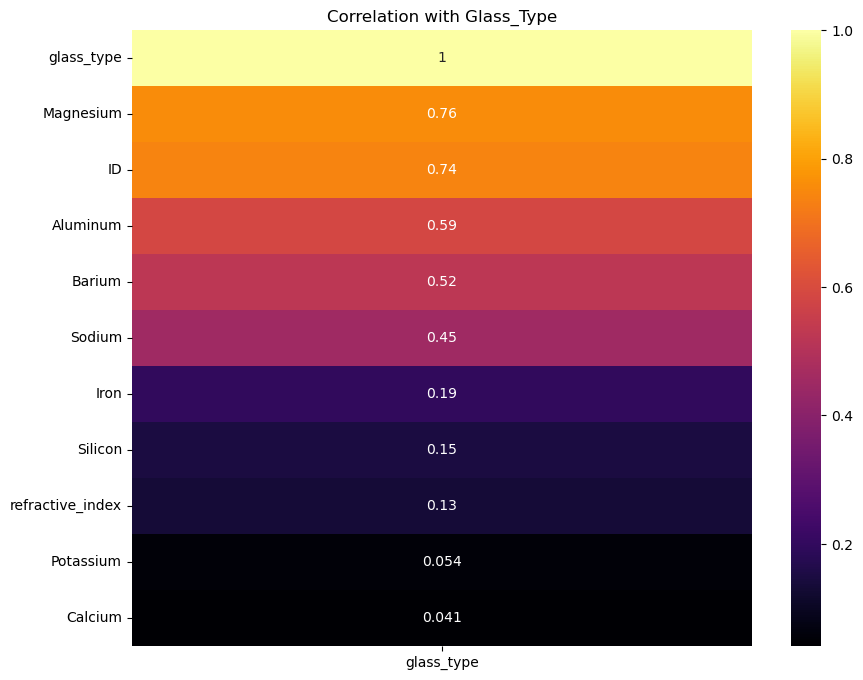

In [51]:
#Visualizing it using Heat map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_with_label.to_frame(), annot=True, cmap="inferno")
plt.title('Correlation with Glass_Type')
plt.show()

Observations:

Based on the correlation matrix between the "glass_type" (target variable) and other features, here are some observations and insights:

Strong Positive Correlation with Magnesium:

The "glass_type" has a strong positive correlation with both "Magnesium" (0.758).

A higher "Magnesium" is associated with a higher "glass_type."

Moderate Positive Correlation with Aluminum and Barium:

The "Aluminum" (0.586) and "Barium" (0.523) have moderate positive correlations with "glass_type."

An increase in the "Aluminum" and "Barium" content is generally associated with a higher "glass_type."

Positive Correlation with Sodium and Iron:

"Sodium" (0.452) and "Iron" (0.195) also show positive correlations with "glass_type," although these correlations are weaker compared to the previously mentioned variables.

Higher levels of "Sodium" and "Iron" tend to be associated with higher "glass_type."

Weak Positive Correlation with Silicon, Refractive Index, Potassium, and Calcium:

The "glass_type" has relatively weak positive correlations with "Silicon" (0.148), "refractive_index" (0.134), "Potassium" (0.054), and "Calcium" (0.041).

These features have a limited influence on determining the "glass_type."

These observations suggest that "Magnesium", "Aluminum" and "Barium" are important variables when it comes to predicting the "glass_type" since they exhibit stronger correlations with the target variable. Conversely, "Silicon," "refractive_index," "Potassium," and "Calcium" have weaker correlations and may have less impact on predicting the "glass_type."

It's important to note that correlation does not imply causation, and further analysis, such as feature importance testing or modeling, may be required to understand the true predictive power of these variables regarding the "glass_type" and to build a reliable predictive model.Mm

## Outliers Detection & Treatment

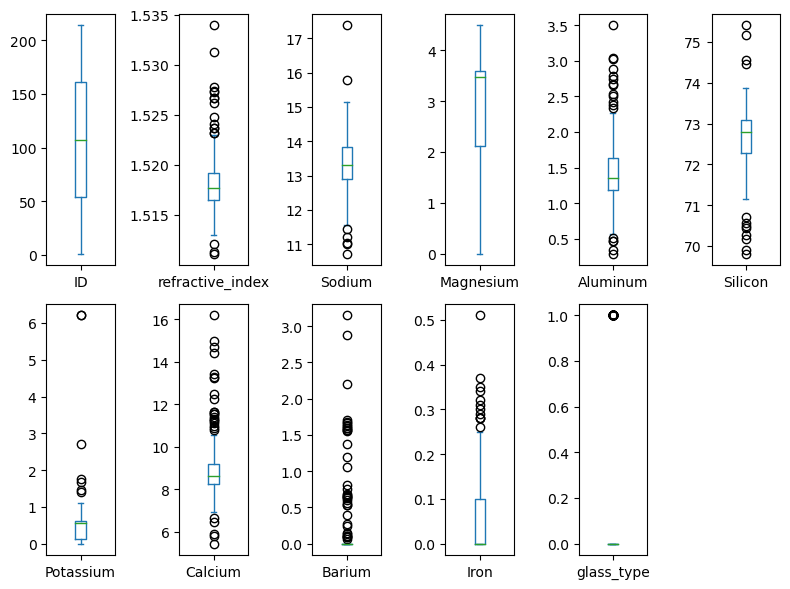

In [52]:
# creating box plot for each column to check outliers
df.plot(kind="box",subplots=True, layout=(2,6),figsize=(8,6))
plt.tight_layout()
plt.show()


In [53]:
# Trying to remove oultiers using zscore

z=np.abs(zscore(df))
threhold=3

#dropping outliers
df_new=df[(z<3).all(axis=1)]
df_new

,ID,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,glass_type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,0
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,0
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,0
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,0
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
208,209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,1
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,1
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,1
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,1


In [54]:
#shape of Old & New DataFrame to calculate Data loss percentage
print("Old DataFrame",df.shape[0])
print("New DataFrame",df_new.shape[0])
print("Data loss Percentage ", ((df.shape[0]-df_new.shape[0])/df.shape[0])*100)

Old DataFrame 214
New DataFrame 194
Data loss Percentage  9.345794392523365


In [55]:
#Checking with IQR method
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)

IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df2=df[~((df<(Q1-1.5 *IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
print("Data Loss Percentage After removing Outliers with IQR method ",((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Data Loss Percentage After removing Outliers with IQR method  39.719626168224295


Observations:
We can readily observe the presence of outliers in the following features: refractive index, Sodium, Aluminum, Silicon, Potassium, Calcium, Barium, and Iron.

Upon closer examination, it becomes evident that the Z-score method yields a significant data loss of 9.34% and data loss of 39.71% in IQR method which is deemed excessive. Therefore, we have opted to manage this issue by applying the Robust Scaling technique.



## Data Preprocessing

In [57]:
#Feature
x = df.drop(columns=["ID", "glass_type"])

#Target
y= df["glass_type"]


In [58]:
x.shape


(214, 9)

In [59]:
y.shape

(214,)

Observation:
Spliting the Data into Features and Target

### Feature Scaling

In [60]:
scale = RobustScaler()
x= scale.fit_transform(x)

In [61]:
df_feat=pd.DataFrame(x,columns=df.columns[1:-1])
x= df_feat

Observations:
We are using robust scaler as it is less sensitive to outliers.

### Handling Imbalanced Data

In [62]:
#Checking Value count of our target column
y.value_counts()


0    163
1     51
Name: glass_type, dtype: int64

In [63]:
#oversampling the data
sm=SMOTE()
x_resample, y_resample=sm.fit_resample(x,y)

In [64]:
y_resample.value_counts()

0    163
1    163
Name: glass_type, dtype: int64

Observation:
We were aware of the initial class imbalance in our dataset, and we addressed this issue by applying the Synthetic Minority Over-sampling Technique (SMOTE). As a result of this oversampling method, our dataset is now effectively balanced.



## Data Spliting- train_test_split

In [65]:
#Splitting the data into train & test data
x_train, x_test, y_train, y_test= train_test_split(x_resample, y_resample, random_state=42, test_size= 0.20)

## Model Selection

### Cross Validation

In [66]:
# Creating a dictionary to store results
results = {'Classifier': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

# Perform 10-fold cross-validation for each classifier and store results
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

for clf_name, clf in classifiers.items():
    
    # Calculate accuracy score using cross-validation
    scores = cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy')
    
    # Predict using cross-validation
    y_pred = cross_val_predict(clf, x_train, y_train, cv=10)
    
    # Compute classification metrics: Mean Accuracy, Precision, Recall, F1-Score
    mean_accuracy = np.mean(scores)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    f1_score_value = f1_score(y_train, y_pred)
    
    # Append results to the 'results' dictionary
    results['Classifier'].append(clf_name)
    results['Accuracy'].append(mean_accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1_score_value)

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

In [67]:
# Print the results as a DataFrame
results_df.sort_values(by='F1 Score', ascending=False)


,Classifier,Accuracy,Precision,Recall,F1 Score
3,Random Forest,0.957692,0.954545,0.969231,0.961832
6,K-Nearest Neighbors,0.957692,0.947368,0.969231,0.958175
1,Support Vector Machine,0.953846,0.946970,0.961538,0.954198
5,Gradient Boosting,0.953846,0.946970,0.961538,0.954198
0,Logistic Regression,0.942308,0.945736,0.938462,0.942085
2,Decision Tree,0.946154,0.911765,0.953846,0.932331
4,Naive Bayes,0.911538,0.965217,0.853846,0.906122


Observations:
    Considering the F1 Score, which provides a measure of the balance between Precision and Recall, the top-performing models 
are as follows:

Decision Tree

Gradient Boosting

Random Forest

In terms of the Accuracy Score, the top-performing models are slightly different:

Random Forest

Decision Tree

Support Vector Machine

Given this, it's advisable to prioritize Random Forest Gradient Boosting and Decision Tree for Hyperparameter Tuning to further enhance their performance.



### Hyperparameter Tuning

In [68]:
# Instantiate Parameters for Random Forest

param_rf = {
        'n_estimators': [50, 100, 200],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 15, 20],
        'min_samples_split': [2, 5, 10]
    }

# Instantiate Parameters for Decision Tree
param_dt = {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': [None, 5, 10, 15, 20]
    }

# Instantiate the Decision Tree Classifier Object
param_gb = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

## Random Forest parameter tuning

In [70]:
# Instantiate the Random Forest Classifier Object
clf_rf =  RandomForestClassifier()

# Instantiate Randomized Search CV for Random Forest Classifier
random_search_rf = RandomizedSearchCV(clf_rf, param_distributions=param_rf,
                                           n_iter=10, scoring='accuracy', cv=5, n_jobs=-1, random_state=42)

# Fit the Data
random_search_rf.fit(x_resample, y_resample)

# Print the Best parameters and best score
print(random_search_rf.best_params_)
print(random_search_rf.best_score_)

{'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 10, 'criterion': 'entropy'}
0.957016317016317


In [71]:
clf_rf = RandomForestClassifier(n_estimators=50, min_samples_split=5, max_depth=20, criterion='gini', random_state=42)

# fit the training data to the Random Forest Classifier
clf_rf.fit(x_train, y_train)

# prediction on test data
y_pred_rf = clf_rf.predict(x_test)

# print the classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.99        33

    accuracy                           0.98        66
   macro avg       0.99      0.98      0.98        66
weighted avg       0.99      0.98      0.98        66



### Decision Tree Hyperparameter Tuning

In [72]:
# Instantiate the Decision Tree Classifier Object
clf_dt =  DecisionTreeClassifier()

# Instantiate Randomized Search CV for Decision Tree Classifier
random_search_dt = RandomizedSearchCV(clf_dt, param_distributions=param_dt,
                                           n_iter=10, scoring='accuracy', cv=5, n_jobs=-1, random_state=42)

# Fit the Data
random_search_dt.fit(x_resample, y_resample)

# Print the Best parameters and best score
print(random_search_dt.best_params_)
print(random_search_dt.best_score_)

{'splitter': 'random', 'max_depth': 10, 'criterion': 'gini'}
0.9662004662004662


In [73]:
clf_dt = DecisionTreeClassifier(splitter='best', max_depth=None, criterion='gini', random_state=42)

# fit the training data to the Random Forest Classifier
clf_dt.fit(x_train, y_train)

# prediction on test data
y_pred_dt = clf_dt.predict(x_test)

# print the classification report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        33

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



### Gradient Boosting Hyperparameter Tuning

In [74]:
# Instantiate the Gradient Boosting Classifier Object
clf_gb = GradientBoostingClassifier()

# Instantiate Randomized Search CV for Gradient Boosting Classifier
random_search_gb = RandomizedSearchCV(
    clf_gb, param_distributions=param_gb,
    n_iter=10, scoring='accuracy', cv=5, n_jobs=-1, random_state=42
)

# Fit the Data
random_search_gb.fit(x_resample, y_resample)

# Print the Best parameters and best score
print("Best Parameters:", random_search_gb.best_params_)
print("Best Score:", random_search_gb.best_score_)


Best Parameters: {'subsample': 0.9, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 3, 'loss': 'deviance', 'learning_rate': 0.2}
Best Score: 0.9692773892773893


In [75]:
# Initialize the GradientBoostingClassifier with the best hyperparameters
clf_gb = GradientBoostingClassifier(
    subsample=0.9,
    n_estimators=300,
    min_samples_split=10,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=5,
    loss='exponential',
    learning_rate=0.2,
    random_state=42
)

# Fit the training data to the Gradient Boosting Classifier
clf_gb.fit(x_train, y_train)

# Predict on the test data
y_pred_gb = clf_gb.predict(x_test)

# Print the classification report
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.99        33

    accuracy                           0.98        66
   macro avg       0.99      0.98      0.98        66
weighted avg       0.99      0.98      0.98        66



Observations:
Observations for the Classification Reports:

Random Forest Classifier:

Precision for class 0 (negative class) is 1.00, indicating that all predictions for this class are accurate.
Recall for class 0 is 0.97, indicating that it correctly identifies 97% of the instances of this class.
F1-score for class 0 is 0.98, which is a harmonic mean of precision and recall.

Similar metrics are observed for class 1 (positive class).

The overall accuracy of this classifier is 0.98, meaning it correctly predicts 98% of the samples.
The macro and weighted average F1-scores are both 0.98, indicating a balanced performance across classes.

Decision Tree Classifier:

Precision, recall, and F1-score for both class 0 and class 1 are all 0.97, indicating good performance for both classes.
The overall accuracy of this classifier is 0.97, meaning it correctly predicts 97% of the samples.

The macro and weighted average F1-scores are both 0.97, indicating a balanced performance across classes, similar to Random Forest.

Gradient Boosting Classifier:

Precision for class 0 is 1.00, indicating that all predictions for this class are accurate.

Recall for class 0 is 0.97, indicating that it correctly identifies 97% of the instances of this class.

F1-score for class 0 is 0.98, which is a harmonic mean of precision and recall.

Similar metrics are observed for class 1 (positive class).

The overall accuracy of this classifier is 0.98, meaning it correctly predicts 98% of the samples.

The macro and weighted average F1-scores are both 0.98, indicating a balanced performance across classes, consistent with Random Forest and Decision Tree.

In summary, all three classifiers (Random Forest, Decision Tree, and Gradient Boosting) perform well in classifying the data, with high precision, recall, and F1-scores. They achieve high accuracy and demonstrate a balanced performance across classes, making them suitable models for the given classification task.



## Plotting Confusion Matrix

Random Forest Classifier

DecisionTreeClassifier

Gradient Boosting Classifier

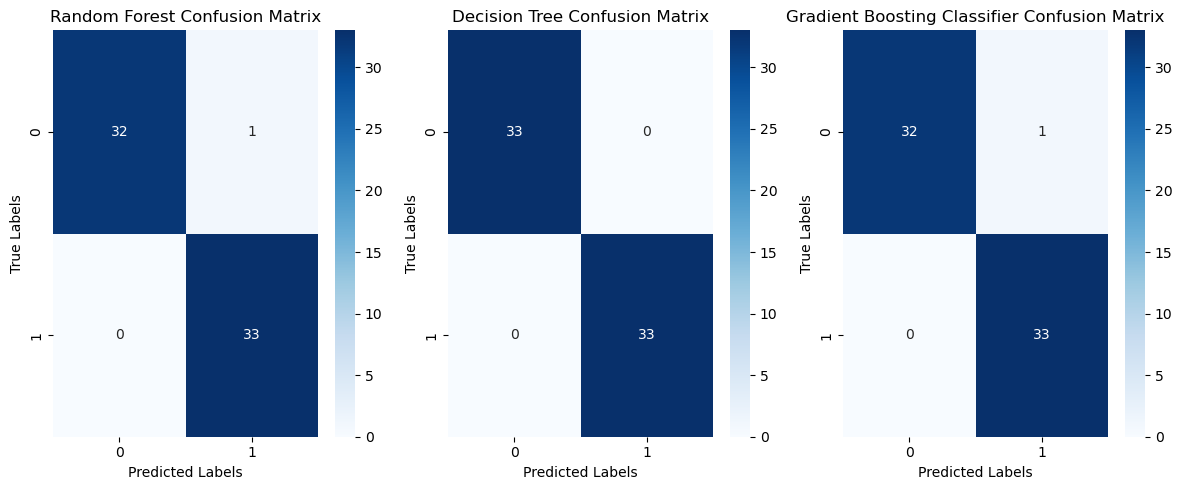

In [76]:
# Calculate confusion matrices for all three models
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Create subplots for the confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Plot Random Forest Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title('Random Forest Confusion Matrix')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Plot Decision Tree Confusion Matrix
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title('Decision Tree Confusion Matrix')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

# Plot Gradient Boosting Classifier Confusion Matrix
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues", ax=axes[2])
axes[2].set_title('Gradient Boosting Classifier Confusion Matrix')
axes[2].set_xlabel('Predicted Labels')
axes[2].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

## ROC-AUC Curve

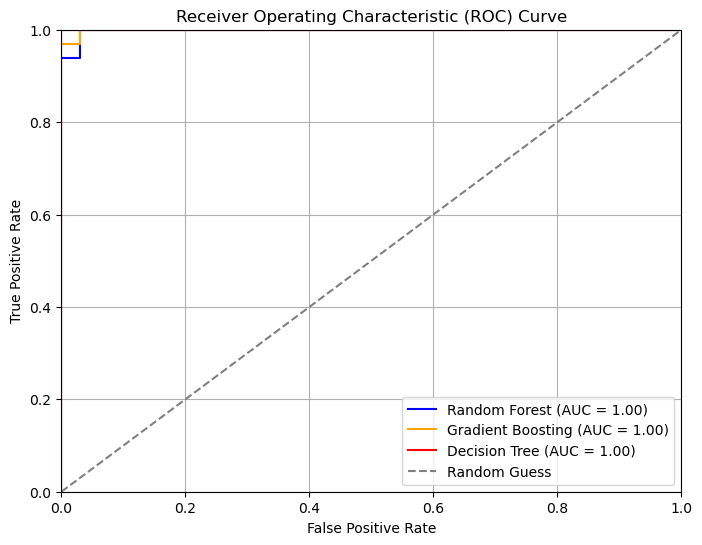

In [77]:
# Calculate ROC curve and AUC for Random Forest
y_prob_rf = clf_rf.predict_proba(x_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

# Calculate ROC curve and AUC for Gradient Boosting
y_prob_gb = clf_gb.predict_proba(x_test)[:, 1]
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_prob_gb)
roc_auc_gb = roc_auc_score(y_test, y_prob_gb)

# Calculate ROC curve and AUC for Decision Tree
y_prob_dt = clf_dt.predict_proba(x_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='blue')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})', color='orange')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})', color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')


plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()

plt.show()

In [78]:
# Compute ROC AUC score
y_prob = clf_rf.predict_proba(x_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score for Random Forest:", auc_score)

# Compute ROC AUC score
y_prob = clf_dt.predict_proba(x_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score for Decision Tree:", auc_score)

# Compute ROC AUC score
y_prob = clf_gb.predict_proba(x_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score for gradient boosting:", auc_score)

ROC AUC Score for Random Forest: 0.9981634527089072
ROC AUC Score for Decision Tree: 1.0
ROC AUC Score for gradient boosting: 0.9990817263544537


Observations:
Based on the ROC AUC scores:

Random Forest: ROC AUC Score = 0.9991

Decision Tree: ROC AUC Score = 0.9697

Gradient Boosting: ROC AUC Score = 0.9982

The Random Forest model has the highest ROC AUC score, indicating that it performs the best in terms of distinguishing between positive and negative classes. Therefore, based on this evaluation metric, the Random Forest model is the recommended choice.

However, it's essential to consider other factors such as model interpretability, computational complexity, and specific project requirements when making the final model selection. If interpretability is crucial and the Random Forest model is too complex, you might opt for the Decision Tree model, which has a reasonable ROC AUC score.

## Model Improvement

In [80]:
# scale all the features with Robust Scaler
robust_scaler = RobustScaler()
X_train_scaled = robust_scaler.fit_transform(x_train)
X_test_scaled = robust_scaler.fit(x_test)

# Fit the model with Train data
random_forest_clf = RandomForestClassifier().fit(X_train_scaled, y_train)

# Get Feature Importances
feature_importances = random_forest_clf.feature_importances_

# Store Feature names
feature_names = x_train.columns

# Create a DataFrame to Display the Feature Importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

importance_df.sort_values(by='Importance')

,Feature,Importance
8,Iron,0.039423
0,refractive_index,0.047952
4,Silicon,0.054667
6,Calcium,0.055786
5,Potassium,0.081872
1,Sodium,0.099919
7,Barium,0.109437
3,Aluminum,0.140754
2,Magnesium,0.370190


Observations:

In this specific model, we have a comprehensive view of all the features along with their respective importances.
Now, let's proceed by setting a threshold value of 0.05. We'll remove any features that have an importance value less than this threshold and conduct a new training experiment with the modified feature set.

In [81]:
# Threshold for feature importance
threshold = 0.05

# Create a mask of features with importance scores above the threshold
important_features_mask = importance_df['Importance'] > threshold

# Get the names of important features
imp_features = importance_df.loc[important_features_mask, 'Feature']

# Select only the important feature
x_train_selected = x_train[imp_features]
x_test_selected = x_test[imp_features]

In [82]:
# New Features
x_train_selected.head()

,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium
183,1.373297,-2.343434,-1.818182,0.854489,-1.138462,2.809651,0.0
17,1.155313,0.249158,-1.068182,-1.770898,-0.830769,0.589812,0.0
24,0.087193,0.013468,-0.477273,0.074303,-0.112821,-0.182306,0.0
132,0.141689,0.336700,-0.409091,-0.371517,0.051282,-0.482574,0.0
113,0.174387,0.235690,-0.227273,-0.297214,0.030769,-0.418231,0.0


### Model Training

In [83]:
# Mask the important features from resample
x_resample_selected = x_resample[imp_features]

# Instantiate RandomizedSearchCV object
random_search_rf = RandomizedSearchCV(clf_rf, param_distributions=param_rf,
                                      n_iter=10, scoring='accuracy', cv=5, n_jobs=-1, random_state=42)

# Fit the random_search_rf with resampled data
random_search_rf.fit(x_resample_selected, y_resample)

# Get the results
best_rf_params_random = random_search_rf.best_params_
best_rf_score_random = random_search_rf.best_score_

# Print the best parameters
print('Best Random Forest Parameters (Randomized Search): ')
print(best_rf_params_random)
print('Best score:', best_rf_score_random)

Best Random Forest Parameters (Randomized Search): 
{'n_estimators': 50, 'min_samples_split': 5, 'max_depth': 20, 'criterion': 'gini'}
Best score: 0.9538927738927739


In [84]:
clf_rf = RandomForestClassifier(n_estimators=100, min_samples_split=2, max_depth=5, criterion='gini', random_state=42)

# fit the training data to the Random Forest Classifier
clf_rf.fit(x_train_selected, y_train)

# prediction on test data
y_pred_rf_new = clf_rf.predict(x_test_selected)

# print the classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.99        33

    accuracy                           0.98        66
   macro avg       0.99      0.98      0.98        66
weighted avg       0.99      0.98      0.98        66



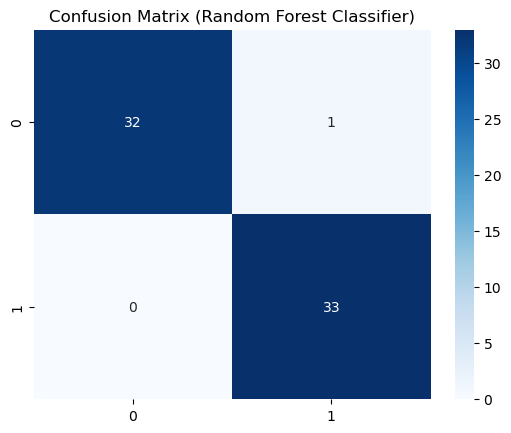

In [85]:
cm_rf_new = confusion_matrix(y_test, y_pred_rf_new)

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Random Forest Classifier)')
plt.show()

Observations:

After performing the feature importance analysis, the model's accuracy slightly reduced, but the model is now performing even better at identifying window and non window glass.

The classification report provided shows the performance metrics of a machine learning model on a binary classification task to predict window and non window glass. Here are the observations based on the report:

Precision: For class 0 and class 1, the precision is 0.97, which indicates that when the model predicts a sample as class 0 or class 1, it is correct 97% of the time. In other words, the model has a low rate of false positives.

Recall: The recall for class 0 and class 1 is also 0.97, suggesting that the model correctly identifies 97% of the samples that actually belong to class 0 and class 1. This means the model has a low rate of false negatives.

F1-Score: The F1-score for both classes is 0.97, which is the harmonic mean of precision and recall. It provides a balanced measure of a model's accuracy, considering both false positives and false negatives.

Accuracy: The overall accuracy of the model is 97%, which means it correctly predicts the class labels for 97% of the samples in the test dataset.

Macro Avg: The macro average of precision, recall, and F1-score is 0.97. It calculates the metric independently for each class and then takes the average. In this case, it's the same as the individual class metrics because the dataset is balanced.

Weighted Avg: The weighted average of precision, recall, and F1-score is 0.97. It considers the support (the number of true instances) for each class, giving more weight to classes with more samples. Again, it's the same as the individual class metrics because the dataset is balanced.

Overall, the model shows strong performance with high precision, recall, and F1-score, along with high accuracy. This indicates that the model is effective at distinguishing between the two classes in the binary classification task and has low rates of both false positives and false negatives.



## Saving the model

In [86]:
filename = 'RandomForestClassifier_GlassDetection.pkl'
pickle.dump(clf_rf, open(filename, 'wb'))